# Analyse et prétraitement des données


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from pandas.api.types import is_numeric_dtype

## 1.1. Données statiques

### 1.1.1. Manipulation de dataset 

#### Importer et visualiser le contenu du dataset

In [2]:
data1 = pd.read_csv('Dataset1.csv')
print("Taille du Dataset1 : ", data1.shape)
data1

Taille du Dataset1 :  (885, 14)


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [3]:
print(data1.head())

     N    P    K    pH    EC    OC     S    Zn    Fe    Cu    Mn     B  \
0  138  8.6  560  7.46  0.62  0.70   5.9  0.24  0.31  0.77  8.71  0.11   
1  213  7.5  338  7.62  0.75  1.06  25.4  0.30  0.86  1.54  2.89  2.29   
2  163  9.6  718  7.59  0.51  1.11  14.3  0.30  0.86  1.57  2.70  2.03   
3  157  6.8  475  7.64  0.58  0.94  26.0  0.34  0.54  1.53  2.65  1.82   
4  270  9.9  444  7.63  0.40  0.86  11.8  0.25  0.76  1.69  2.43  2.26   

       OM  Fertility  
0  1.2040          0  
1  1.8232          0  
2  1.9092          0  
3  1.6168          0  
4  1.4792          1  


#### Fournir une description globale du dataset

In [4]:
dataset_description = {}
dataset_description["Nombre de lignes"] = data1.shape[0]
dataset_description["Nombre de colonnes"] = data1.shape[1]
dataset_description["Usage en memoire"] = str(data1.memory_usage(index=False).sum() / 1024) + " ko"
dataset_description["Type de donnees"] = list(map(str, data1.dtypes.unique().tolist()))
pd.DataFrame.from_dict(dataset_description, orient='index', columns = [""])


,
Nombre de lignes,885
Nombre de colonnes,14
Usage en memoire,96.796875 ko
Type de donnees,"[int64, object, float64]"


#### Fournir une description de chaque attribut.

In [5]:
colonnes_description = []
for d in data1:
    colonnes_description.append([d, data1[d].count(), str(data1.dtypes[d]), data1[d].nunique()])
pd.DataFrame(colonnes_description, columns = ["Nom","Valeur non null","Type","Nombre de valuers unique"])

,Nom,Valeur non null,Type,Nombre de valuers unique
0,N,885,int64,61
1,P,885,object,93
2,K,885,int64,63
3,pH,885,float64,107
4,EC,885,float64,71
5,OC,884,float64,68
6,S,885,float64,153
7,Zn,885,float64,70
8,Fe,885,float64,387
9,Cu,884,float64,166


In [6]:
unique_values1 = data1.nunique()
print(f"Le nombre de valeurs uniques de chaque attributs :\n{unique_values1}")

Le nombre de valeurs uniques de chaque attributs :
N             61
P             93
K             63
pH           107
EC            71
OC            68
S            153
Zn            70
Fe           387
Cu           166
Mn           429
B            127
OM            68
Fertility      3
dtype: int64


In [7]:
missing_values = data1.isnull().sum()
print(f"Valeurs manquantes par attribut :\n{missing_values}")

Valeurs manquantes par attribut :
N            0
P            0
K            0
pH           0
EC           0
OC           1
S            0
Zn           0
Fe           0
Cu           1
Mn           0
B            0
OM           0
Fertility    0
dtype: int64


### 1.1.2. Analyse des caractéristiques des attributs du dataset 

#### Calcule des mesures de tendance centrale et en déduction des symétries

In [7]:
data1["P"] = pd.to_numeric(data1["P"], errors='coerce')

# Calculer la moyenne, la médiane et le mode pour chaque attribut
central_tendencies = data1.agg(['mean', 'median'])

# Calculer la symétrie en comparant la moyenne et la médiane
symmetries = central_tendencies.loc['mean'] - central_tendencies.loc['median']

# calaculer le mode 
central_tendencies.loc['mode'] = data1.mode().iloc[0]

# Afficher les mesures de tendance centrale et les symétries avec l'état de la symétrie
print("Mesures de tendance centrale :")
print(central_tendencies)

# Afficher l'état de la symétrie
print("\nSymétries :")
for column, symmetry in symmetries.iteritems():
    if symmetry > 0.01:
        state = "Positivement inclinée"
    elif symmetry < -0.01:
        state = "Négativement inclinée"
    else:
        state = "Symétrique"
    
    print(f"{column}: {symmetry} ({state})")

Mesures de tendance centrale :
                N          P           K        pH        EC        OC  \
mean    246.99774  14.555266  501.338983  7.511955  0.543921  0.617817   
median  257.00000   8.100000  475.000000  7.500000  0.550000  0.590000   
mode    207.00000   8.300000  444.000000  7.500000  0.530000  0.880000   

               S        Zn        Fe        Cu        Mn         B        OM  \
mean    7.545808  0.468723  4.126757  0.952002  8.653616  0.593424  1.063718   
median  6.640000  0.360000  3.560000  0.930000  8.340000  0.410000  1.014800   
mode    4.220000  0.280000  6.320000  1.250000  7.540000  0.340000  1.513600   

        Fertility  
mean      0.59209  
median    1.00000  
mode      1.00000  

Symétries :
N: -10.002259887005636 (Négativement inclinée)
P: 6.455266138165337 (Positivement inclinée)
K: 26.338983050847446 (Positivement inclinée)
pH: 0.01195480225989698 (Positivement inclinée)
EC: -0.0060790960451979625 (Symétrique)
OC: 0.027816742081446133 (Positi

#### Construire une boîte à moustache et afficher les données aberrantes.


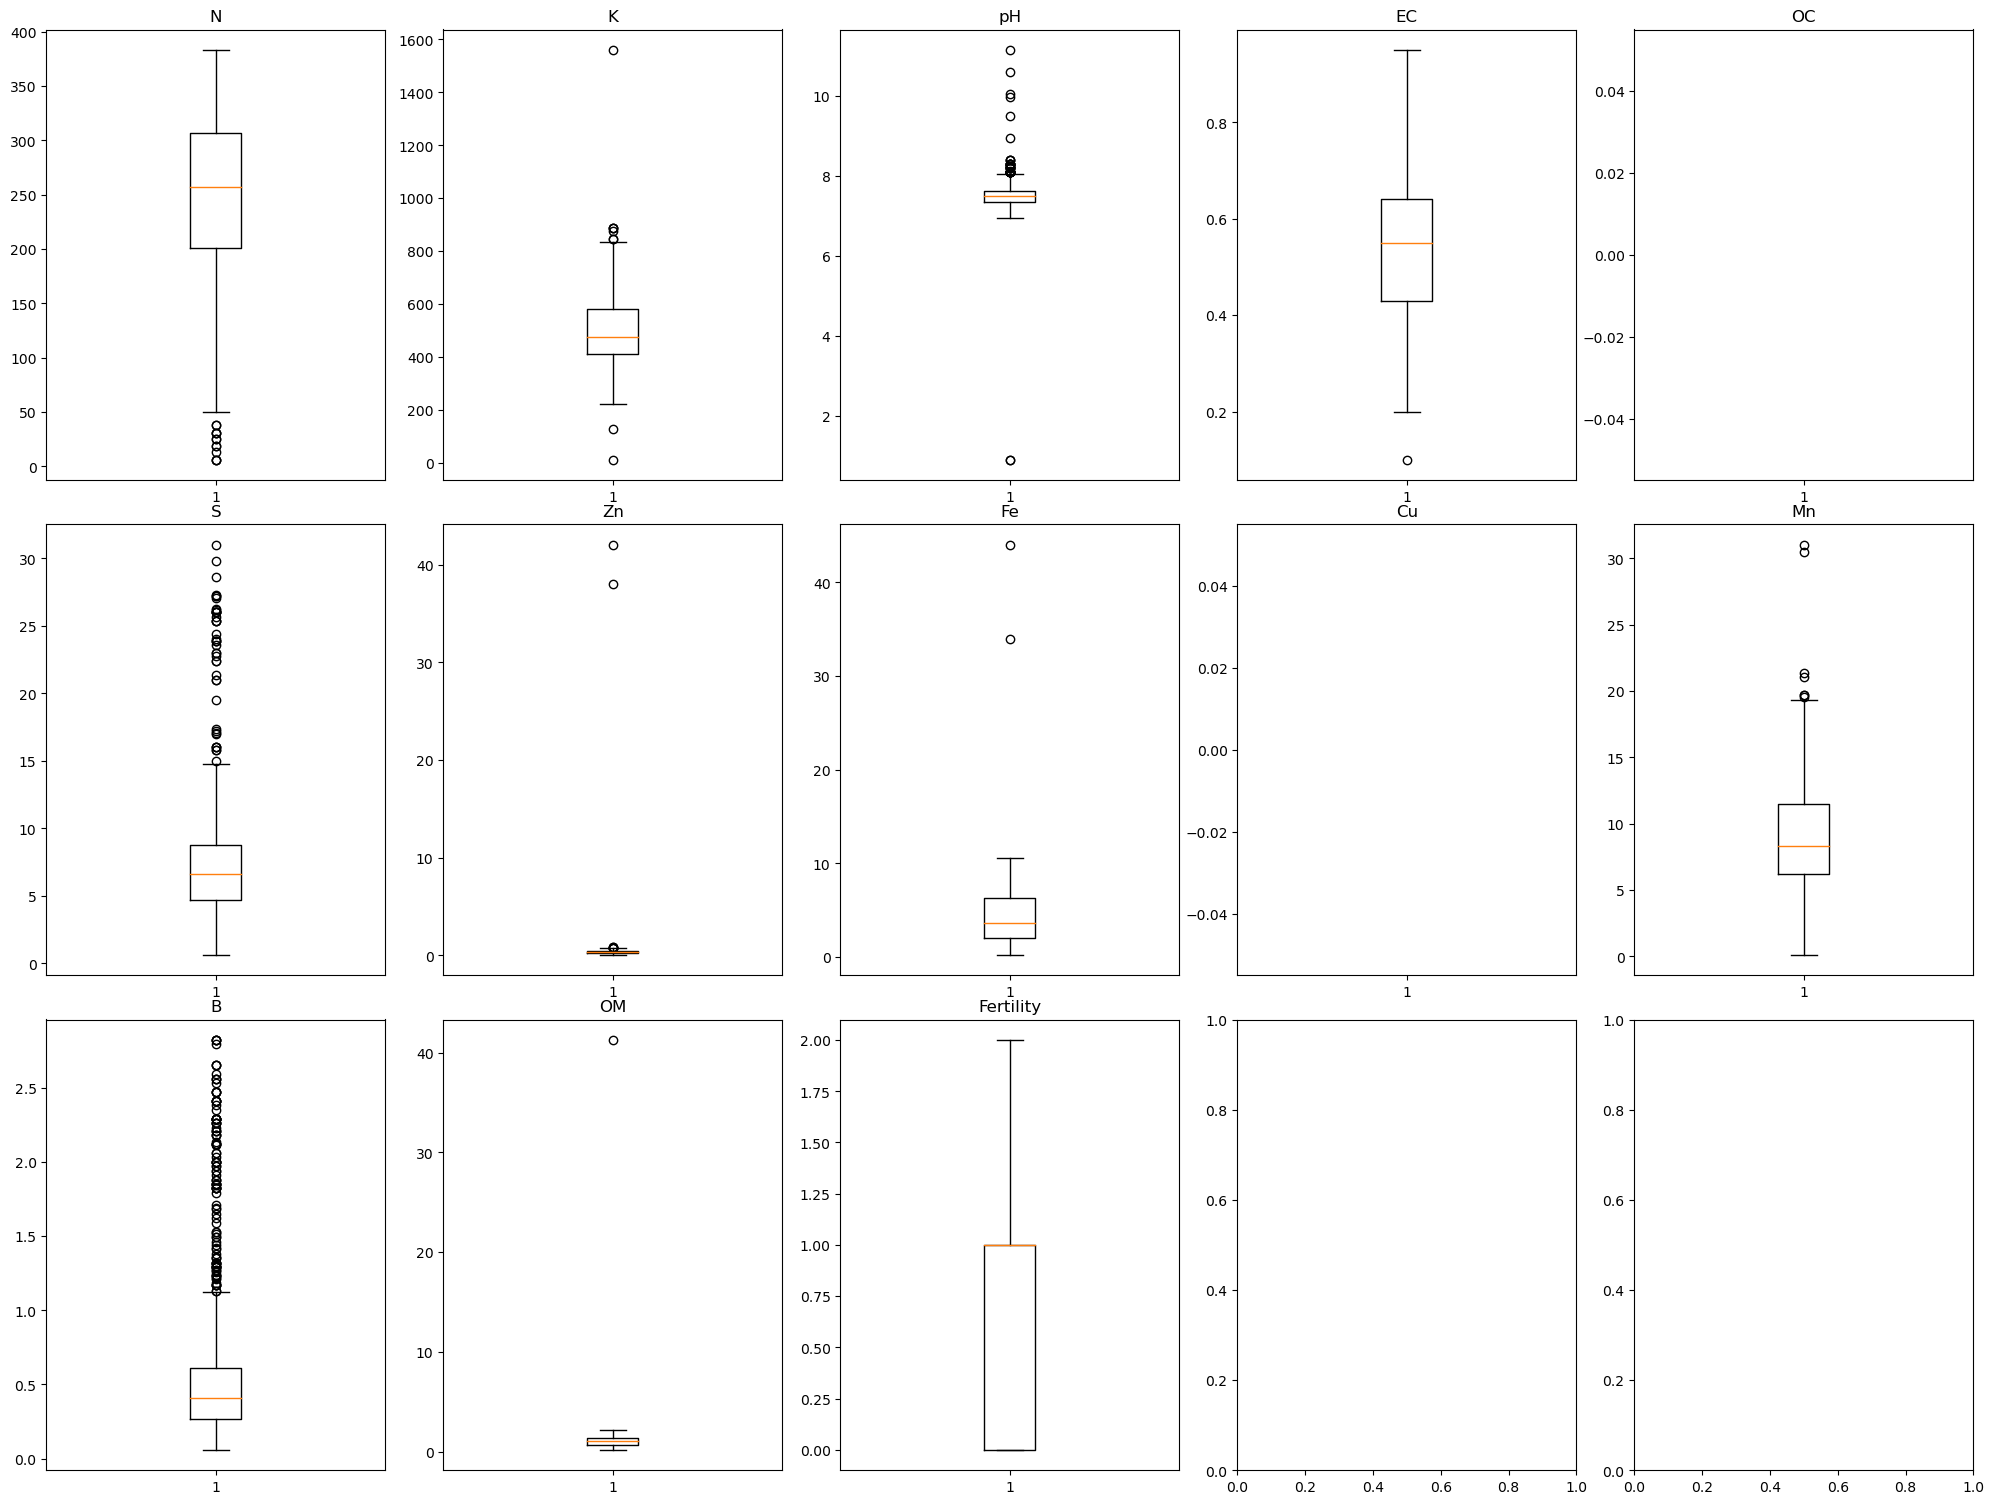

In [40]:
import math
# Calculate the number of rows and columns needed based on the number of numeric columns
num_columns = sum(1 for d in data1 if is_numeric_dtype(data1[d]))
num_rows = math.ceil(num_columns / 5)

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 5 * num_rows))
fig.tight_layout()

# Iterate through each numeric column in the DataFrame
i = 0
j = 0
for d in data1:
    if is_numeric_dtype(data1[d]):
        axes[i, j].boxplot(data1[d])
        axes[i, j].set_title(d)
        j += 1
        if j == 5:
            j = 0
            i += 1

plt.show()

In [11]:
# Identifier et afficher les données aberrantes pour chaque attribut
for column in data1.columns:
    if data1[column].dtype in [int, float]:
        q1 = data1[column].quantile(0.25)
        q3 = data1[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = data1[(data1[column] < lower_bound) | (data1[column] > upper_bound)]
        if not outliers.empty:
            print(f'Données aberrantes pour {column} --------------------------:')
            print(outliers[column])


Données aberrantes pour P --------------------------:
243     59.2
279     78.9
491     18.4
492     20.4
493     19.3
       ...  
825     89.9
826     92.1
827    107.5
828     87.7
829    120.6
Name: P, Length: 77, dtype: float64
Données aberrantes pour pH --------------------------:
8       8.26
34      8.23
328     8.10
339     8.30
356     9.97
520     0.90
522     0.90
526     8.30
529     8.40
530     8.95
531     9.50
532    10.05
533    10.60
534    11.15
536     8.26
552     8.10
557     8.40
558     8.10
559     8.20
571     8.10
619     8.12
662     8.10
664     8.30
690     8.20
691     8.10
693     8.10
696     8.10
697     8.10
698     8.30
703     8.30
704     8.10
707     8.30
708     8.10
734     8.20
744     8.10
784     8.19
790     8.10
804     8.19
810     8.10
848     8.26
849     8.40
Name: pH, dtype: float64
Données aberrantes pour EC --------------------------:
713    0.1
Name: EC, dtype: float64
Données aberrantes pour OC --------------------------:
668    2

#### Construire un histogramme et visualiser la distribution des données

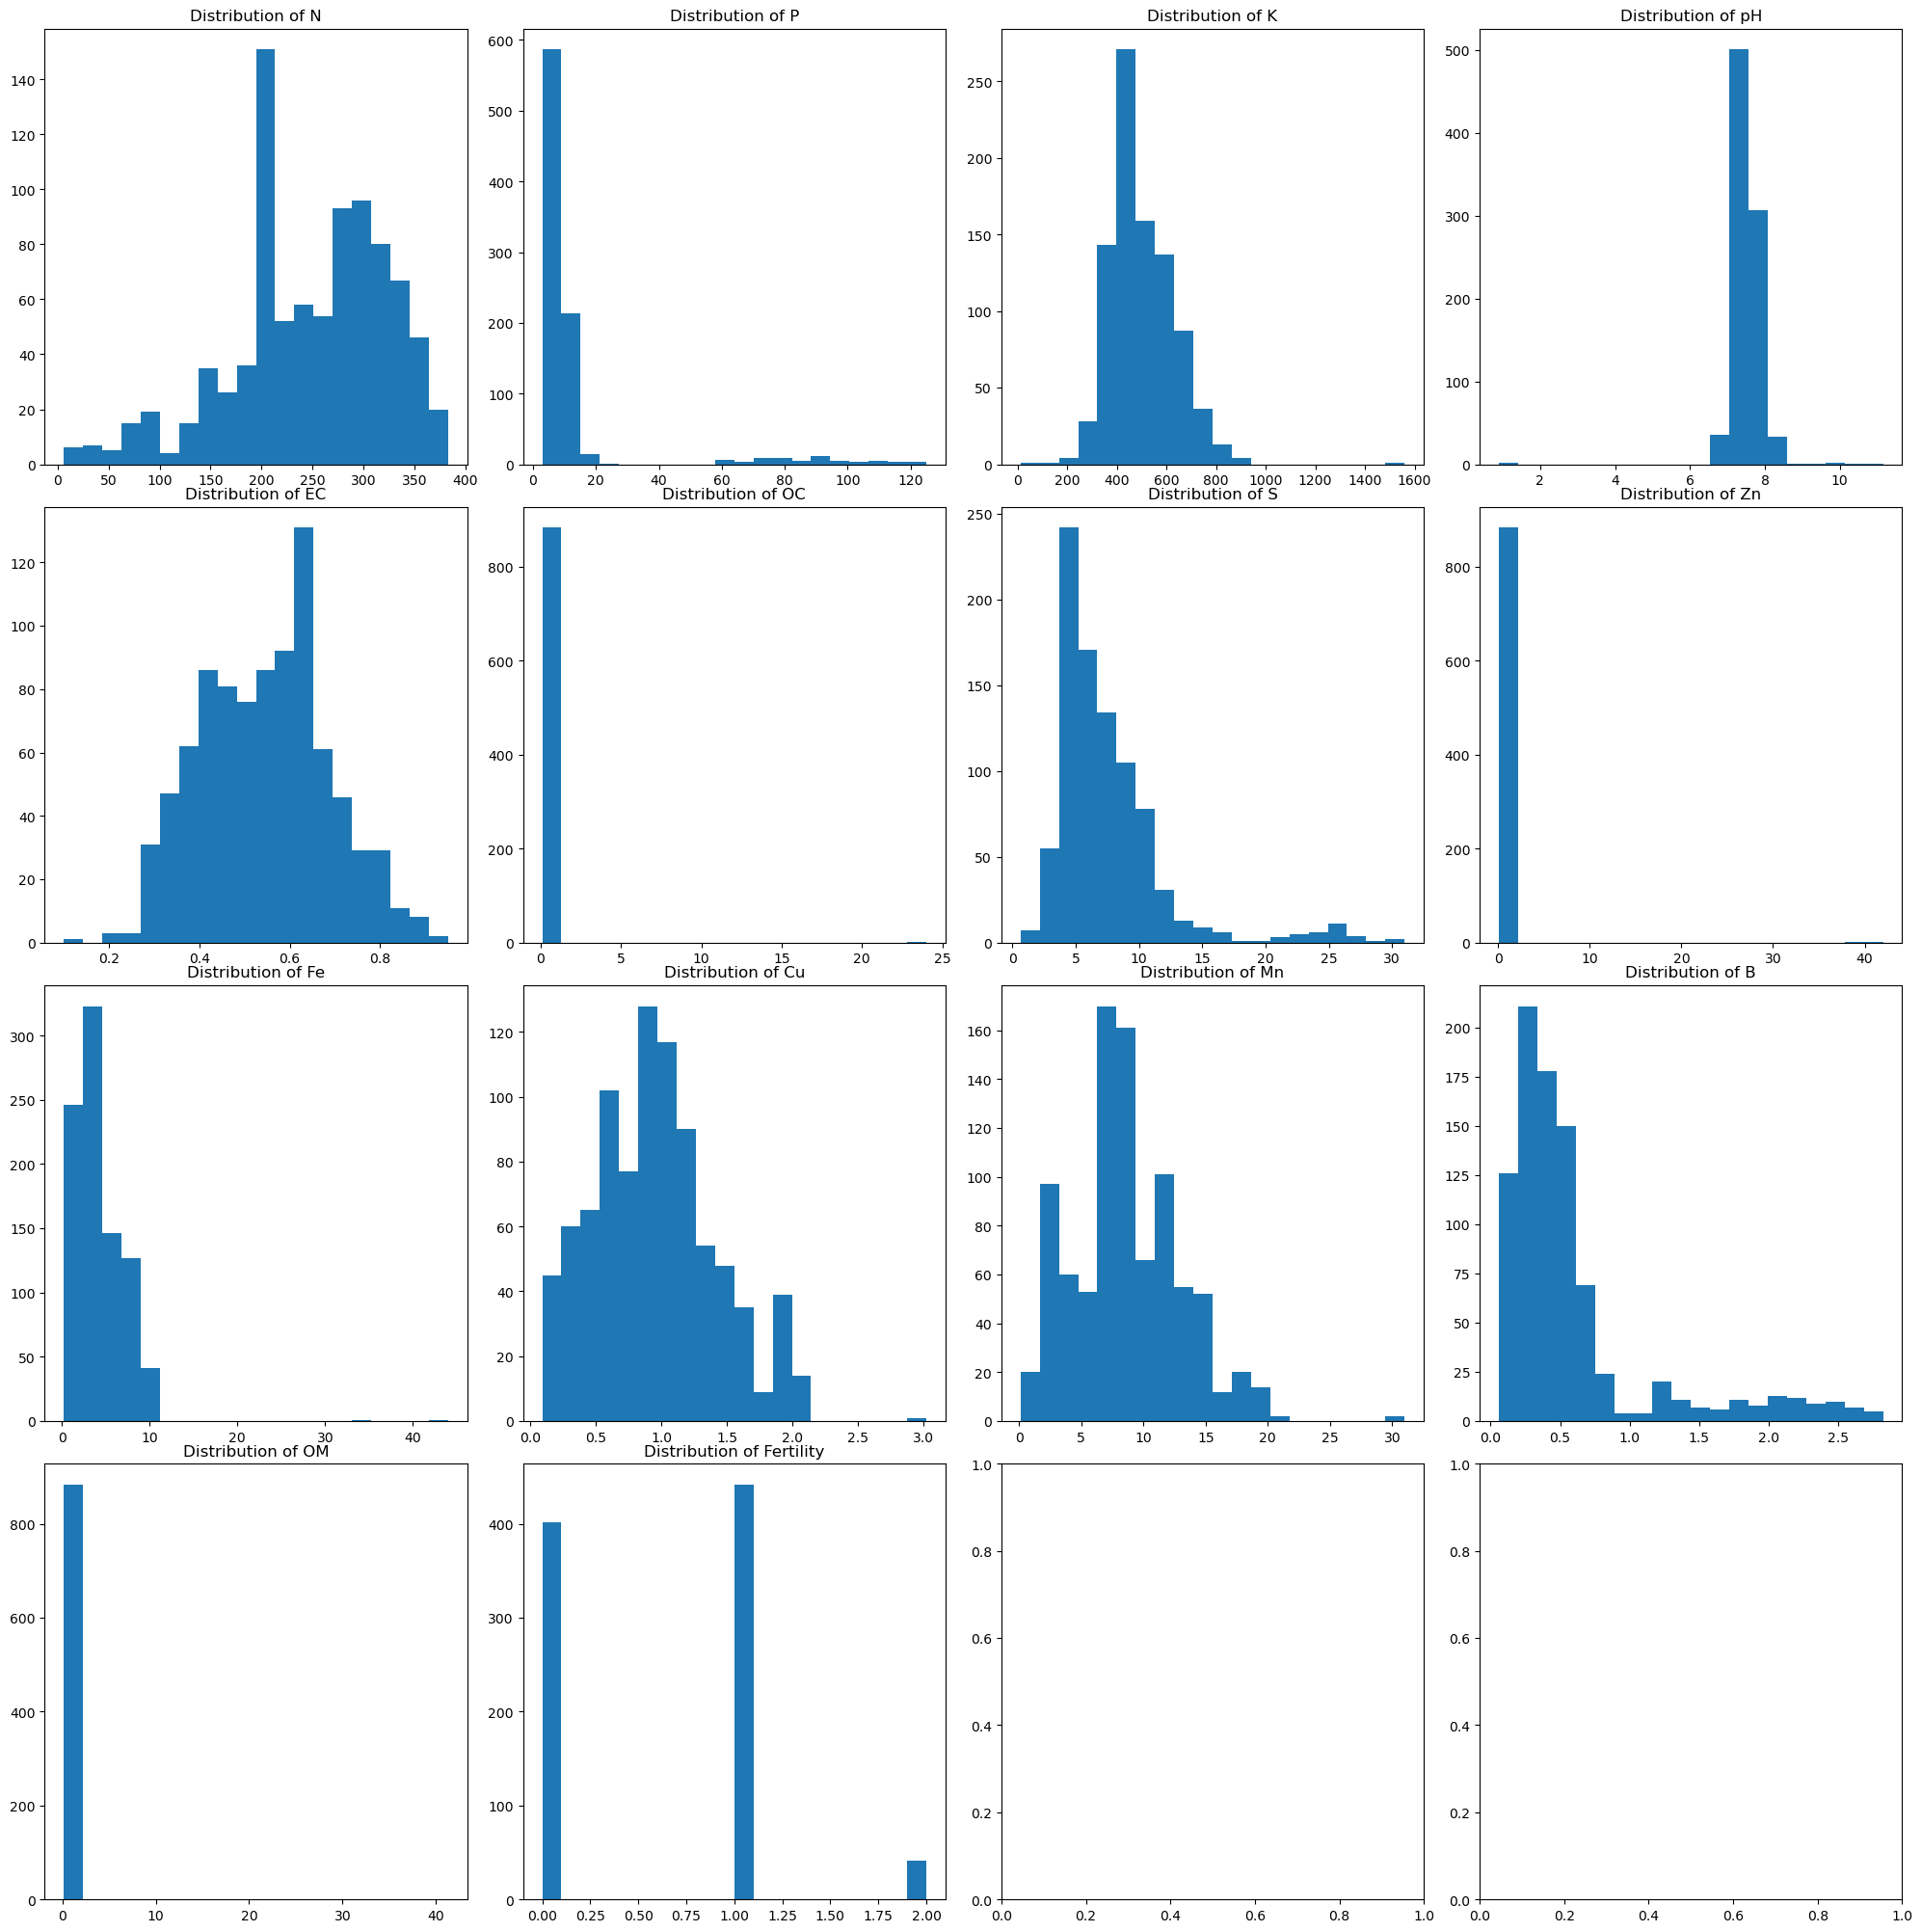

In [25]:
# Calculate the number of rows and columns needed based on the number of numeric columns
num_columns = sum(1 for column in data1.columns if pd.api.types.is_numeric_dtype(data1[column]))
num_rows = math.ceil(num_columns / 4)

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
fig.tight_layout()

# Iterate through each numeric column in the DataFrame
i = 0
j = 0
for column in data1.columns:
    if not pd.api.types.is_numeric_dtype(data1[column]):
        continue
    else:
        data1[column] = pd.to_numeric(data1[column], errors='coerce')
        axes[i, j].hist(data1[column], bins=20)
        axes[i, j].set_title(f'Distribution of {column}')
        j += 1
        if j == 4:
            j = 0
            i += 1

plt.show()

#### Construire et afficher des diagrammes de dispersion des données et en déduire les corrélations entre les propriétés

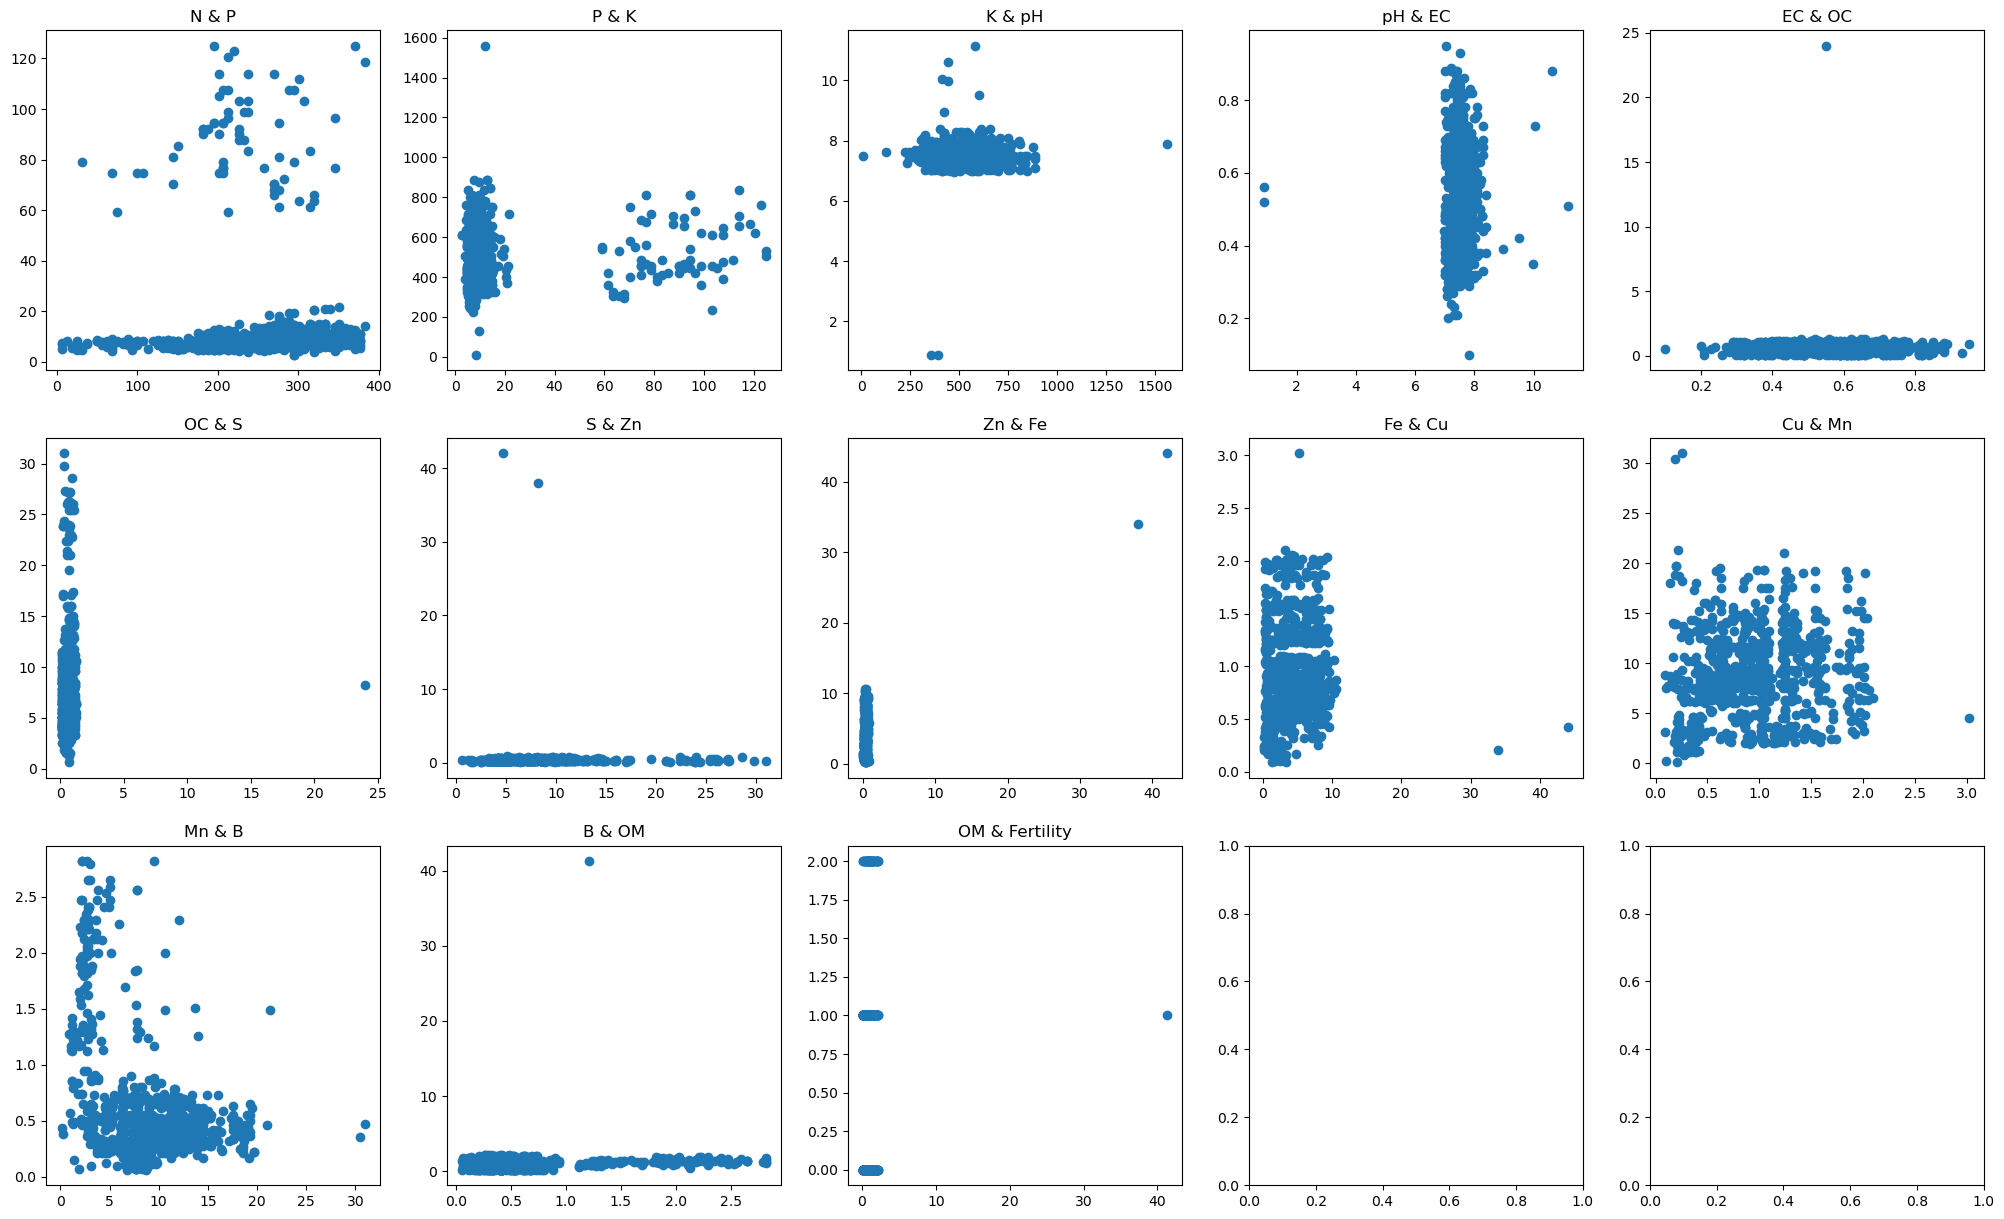

In [30]:
# Calculer et afficher les diagrammes de dispersion pour les paires d'attributs numériques
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
k = 0
j = 0
dd = data1.columns.tolist()
dd = [d for d in dd if is_numeric_dtype(data1[d])]
dd = list(zip(dd, dd[1:]))
for d in dd:
    if is_numeric_dtype(data1[d[0]]) and is_numeric_dtype(data1[d[1]]):
        axes[k, j].scatter(data1[d[0]], data1[d[1]])
        axes[k, j].set_title(d[0] + " & " + d[1])
        j += 1
        if j == 5:
            j = 0
            k += 1
            if k == 3:  # Stop after 3 rows
                break

plt.show()

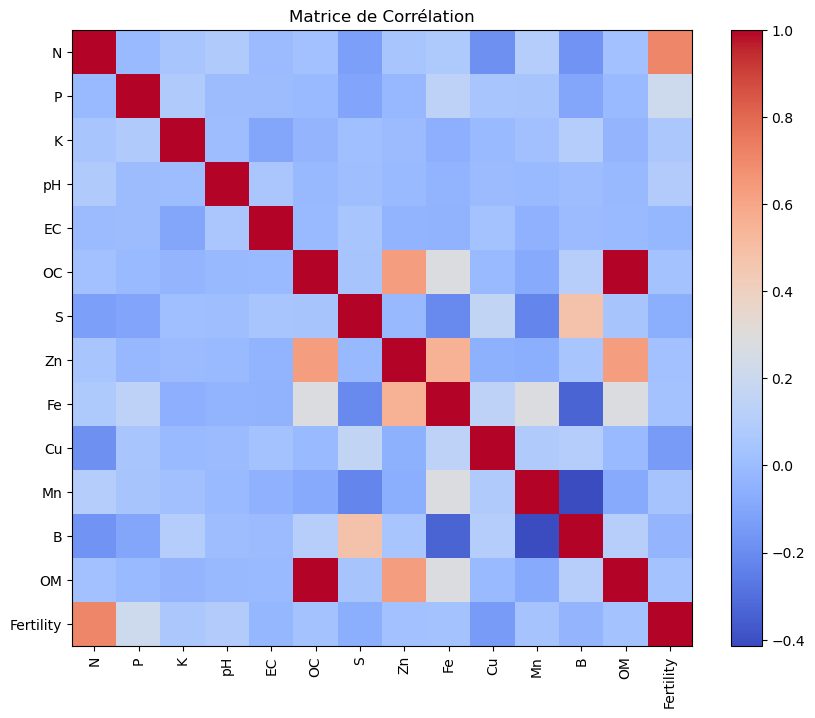

In [26]:
# Calculer et afficher la matrice de corrélation
correlation_matrix = data1.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matrice de Corrélation')
plt.show()

### 1.1.3. Prétraitement 

#### Traitement des valeurs manquantes et aberrantes

##### Remplacement des valeurs manquante

In [8]:
# Remplacer les valeurs manquantes par la moyenne de chaque colonne
data1.fillna(data1.mean(numeric_only=True), inplace=True)

In [9]:
# vérifier que toutes les valuers manquantes sont remplacées 
missing_values = data1.isnull().sum()
print(f"Valeurs manquantes par attribut :\n{missing_values}")

Valeurs manquantes par attribut :
N            0
P            0
K            0
pH           0
EC           0
OC           0
S            0
Zn           0
Fe           0
Cu           0
Mn           0
B            0
OM           0
Fertility    0
dtype: int64


In [10]:
# Remplacez les '?' par NaN dans la colonne spécifiée
data1['P'] = data1['P'].replace('?', np.nan)

# Convertissez la colonne en type numérique
data1['P'] = pd.to_numeric(data1['P'], errors='coerce')

# Remplacez les valeurs NaN par la moyenne de la colonne
mean_value = data1['P'].mean()
data1['P'] = data1['P'].fillna(mean_value)

##### Traitement des valeurs aberrantes

###### Utiliser KNN pour remplacer les valeurs abberantes

In [12]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

def replace_outliers_with_nan(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    outliers_mask = (col < Q1 - 1.5 * IQR) | (col > Q3 + 1.5 * IQR)
    col[outliers_mask] = np.nan
    return col

# Separate numeric and categorical columns
numeric_columns = data1.select_dtypes(include=['number']).columns
categorical_columns = data1.select_dtypes(exclude=['number']).columns

# Apply outlier replacement to numeric columns
data1[numeric_columns] = data1[numeric_columns].apply(replace_outliers_with_nan)

# Scale numeric columns
scaler = StandardScaler()
data1[numeric_columns] = scaler.fit_transform(data1[numeric_columns])

# Use KNNImputer to impute missing values
imputer = KNNImputer(n_neighbors=5)
data1[numeric_columns] = imputer.fit_transform(data1[numeric_columns])

# Display the imputed DataFrame
print(data1)

            N         P         K        pH        EC        OC         S  \
0   -1.543240  0.099285  0.516123 -0.098502  0.537790  0.367106 -0.328422   
1   -0.513038 -0.344625 -1.349519  0.590347  1.462845  1.583318  0.305439   
2   -1.199839  0.502840  1.843923  0.461188 -0.244948  1.752236  2.879068   
3   -1.282255 -0.627113 -0.198199  0.676453  0.253158  1.177914  1.916821   
4    0.269916  0.623906 -0.458717  0.633400 -1.027686  0.907645  1.924458   
..        ...       ...       ...       ...       ...       ...       ...   
880  0.352332  0.341418 -1.080597  0.590347  0.537790 -0.342351 -0.045858   
881  0.956718  2.197768 -0.904118 -0.442926  0.751264  1.617102 -0.507889   
882  0.187500  0.785328 -0.198199  0.030657  1.391687  0.975212  1.450971   
883 -0.416885  0.099285 -0.458717 -0.227661  0.751264  0.434673  1.886273   
884  0.269916 -0.102492  1.314484 -0.141555  0.039684  0.265755  1.313507   

           Zn        Fe        Cu        Mn         B        OM  Fertility 

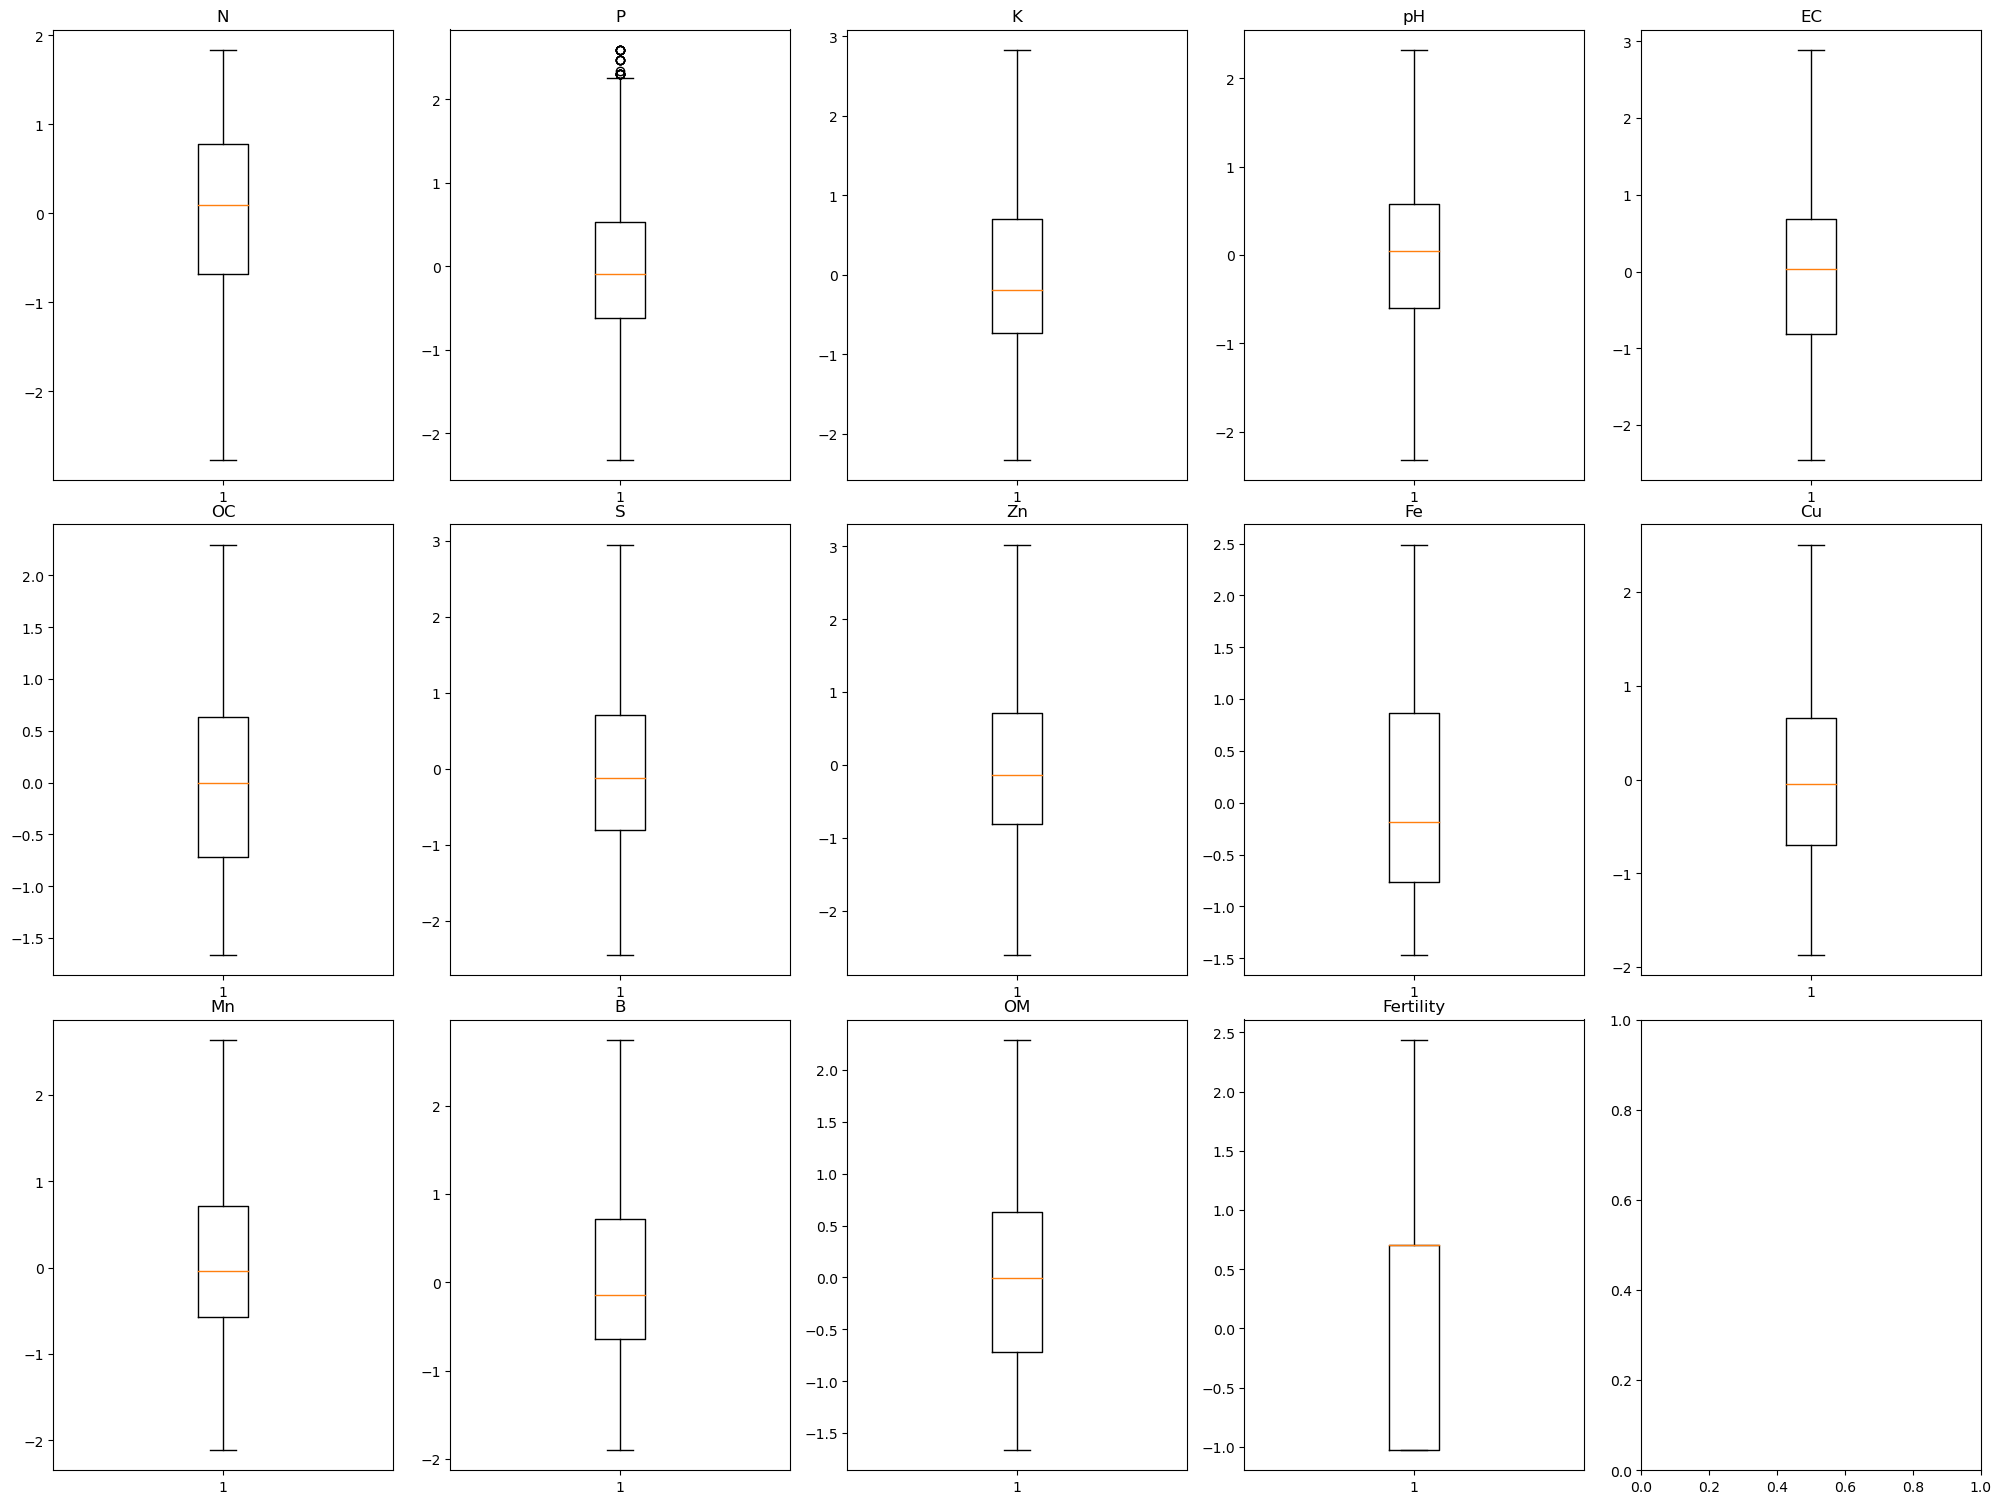

In [48]:
import math
# Calculate the number of rows and columns needed based on the number of numeric columns
num_columns = sum(1 for d in data1 if is_numeric_dtype(data1[d]))
num_rows = math.ceil(num_columns / 5)

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 5 * num_rows))
fig.tight_layout()

# Iterate through each numeric column in the DataFrame
i = 0
j = 0
for d in data1:
    if is_numeric_dtype(data1[d]):
        axes[i, j].boxplot(data1[d])
        axes[i, j].set_title(d)
        j += 1
        if j == 5:
            j = 0
            i += 1

plt.show()

#### Réduction des données

##### Supprimer les redondances horizontales (lignes dupliquées)

In [11]:
# Display duplicate rows before elimination
duplicate_rows = data1[data1.duplicated()]
print("\nDuplicate Rows before:")
print(duplicate_rows)

# Supprimer les redondances horizontales (lignes dupliquées)
data1 = data1.drop_duplicates()

# Display duplicate rows before elimination
duplicate_rows = data1[data1.duplicated()]
print("\nDuplicate Rows After:")
print(duplicate_rows)


Duplicate Rows before:
       N     P    K    pH    EC    OC     S    Zn    Fe    Cu    Mn     B  \
840  377  11.2  623  7.80  0.64  0.54   3.8  0.37  0.88  0.31  1.13  0.85   
883  220   8.6  444  7.43  0.65  0.72  11.7  0.37  0.66  0.90  2.19  1.82   
884  270   8.1  655  7.45  0.55  0.67  10.2  0.28  0.44  1.26  7.75  2.56   

         OM  Fertility  
840  0.9288          2  
883  1.2384          0  
884  1.1524          1  

Duplicate Rows After:
Empty DataFrame
Columns: [N, P, K, pH, EC, OC, S, Zn, Fe, Cu, Mn, B, OM, Fertility]
Index: []


##### Supprimer les redondances verticale 

In [12]:
data1.drop('OM', axis=1, inplace=True)
data1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17116\3934490576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('OM', axis=1, inplace=True)


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
879,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


In [14]:
data1.to_csv("data1.csv", index=False)

#### Normalisation des données

##### Méthode Min-Max


In [15]:
from sklearn.preprocessing import MinMaxScaler
# Créer un objet MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la normalisation Min-Max aux données
data_normalized = scaler.fit_transform(data1)

# Créer un nouveau DataFrame avec les données normalisées
data_normalized = pd.DataFrame(data_normalized, columns=data1.columns)
data_normalized

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Fertility
0,0.264264,0.435115,0.552288,0.458716,0.560000,0.512821,0.371469,0.250000,0.009671,0.338308,0.447683,0.047170,0.0
1,0.489489,0.351145,0.189542,0.605505,0.733333,0.820513,0.488701,0.338235,0.062863,0.721393,0.144716,0.303774,0.0
2,0.339339,0.511450,0.810458,0.577982,0.413333,0.863248,0.964689,0.338235,0.062863,0.736318,0.134826,0.600000,0.0
3,0.321321,0.297710,0.413399,0.623853,0.506667,0.717949,0.786723,0.397059,0.031915,0.716418,0.132223,0.377358,0.0
4,0.660661,0.534351,0.362745,0.614679,0.266667,0.649573,0.788136,0.264706,0.053191,0.796020,0.120770,0.383019,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.903904,0.595420,0.655229,0.917431,0.413333,0.162393,0.466102,0.426471,0.433269,0.298507,0.568454,0.594340,0.5
878,0.642643,0.465649,0.431373,0.256881,0.360000,0.000000,0.231638,0.411765,0.778530,0.179104,0.409682,0.320755,0.5
879,0.678679,0.480916,0.241830,0.605505,0.560000,0.333333,0.423729,0.514706,0.324952,0.268657,0.331598,0.245283,0.5
880,0.810811,0.832061,0.276144,0.385321,0.600000,0.829060,0.338277,0.750000,0.422631,0.462687,0.684019,0.443396,1.0


##### Méthode z-score

In [16]:
from sklearn.preprocessing import StandardScaler
# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation z-score aux données
data_normalized = scaler.fit_transform(data1)

# Créer un nouveau DataFrame avec les données normalisées
data_normalized = pd.DataFrame(data_normalized, columns=data1.columns)
data_normalized

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Fertility
0,-1.528322,0.086510,0.520798,-0.104275,0.539198,0.365174,-0.360524,-1.145883,-1.431904,-0.391023,0.042465,-1.564223,-1.024446
1,-0.497746,-0.370214,-1.352056,0.596250,1.463744,1.579335,0.267539,-0.641053,-1.221542,1.281182,-1.385269,-0.116504,-1.024446
2,-1.184797,0.501714,1.853730,0.464902,-0.243111,1.747969,2.817626,-0.641053,-1.221542,1.346332,-1.431879,1.554761,-1.024446
3,-1.267243,-0.660857,-0.196286,0.683816,0.254722,1.174615,1.864181,-0.304500,-1.343934,1.259465,-1.444145,0.298651,-1.024446
4,0.285492,0.626275,-0.457811,0.640033,-1.025419,0.904801,1.871748,-1.061745,-1.259789,1.606936,-1.498114,0.330586,0.709837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,1.398515,0.958438,1.052283,2.084865,-0.243111,-1.017621,0.146467,-0.136224,0.243343,-0.564759,0.611596,1.522826,0.709837
878,0.203046,0.252591,-0.103487,-1.067496,-0.527586,-1.658429,-1.109659,-0.220362,1.608783,-1.085965,-0.136615,-0.020699,0.709837
879,0.367938,0.335632,-1.082095,0.596250,0.539198,-0.343087,-0.080544,0.368606,-0.185031,-0.695060,-0.504588,-0.446498,0.709837
880,0.972543,2.245569,-0.904933,-0.454537,0.752554,1.613062,-0.538349,1.714818,0.201270,0.151900,1.156195,0.671226,2.444120


## Données temporelle 

In [1]:
import seaborn as sns
from pandas.api.types import is_numeric_dtype

### Prétraitement des données

#### Importer et visualiser les données 

In [13]:
import pandas as pd 
data2 = pd.read_csv('Dataset2.csv')
print("Taille du Dataset2 est : ", data2.shape)
data2

Taille du Dataset2 est :  (337, 11)


,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May,21-May,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,12-Jun,2-Jul,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,28-Jun,18-Jul,53.0,1379.0,61.0,10.9,282.8,4.4


#### Traitement de valeurs numérique manquantes

In [14]:
# Afficher le nombre de valeurs manquantes pour chaque attribut
valeurs_manquantes = data2.isnull().sum()
print(f'Le nombre de valeurs manquantes pour chaque attribut :\n{valeurs_manquantes}')

Le nombre de valeurs manquantes pour chaque attribut :
zcta                0
time_period         0
population          0
Start date          0
end date            0
case count         26
test count         12
positive tests     27
case rate           0
test rate           0
positivity rate     0
dtype: int64


In [15]:
# Remplacer les valeurs manquantes par la moyenne de chaque colonne
data2 = data2.fillna(data2.median(numeric_only=True))
# Afficher le nombre de valeurs manquantes après le remplacement
valeurs_manquantes_apres_remplacement = data2.isnull().sum()
print(f'Le nombre des valeurs manquantes par attribut :\n{valeurs_manquantes_apres_remplacement}')

Le nombre des valeurs manquantes par attribut :
zcta               0
time_period        0
population         0
Start date         0
end date           0
case count         0
test count         0
positive tests     0
case rate          0
test rate          0
positivity rate    0
dtype: int64


#### Traitement des dates manquantes

In [16]:
valid_dates_data = data2.iloc[:191].copy()
# Keep only the specified columns
valid_dates_data = valid_dates_data[['time_period', 'Start date', 'end date']].copy()

# Print the 'no_valid_dates' DataFrame
print(valid_dates_data)

     time_period  Start date    end date
0             32  10/11/2020  10/31/2020
1             43   5/30/2021   6/19/2021
2             40   3/28/2021   4/17/2021
3             55    2/6/2022   2/26/2022
4             44   6/20/2021   7/10/2021
..           ...         ...         ...
186           62    7/3/2022   7/23/2022
187           65    9/4/2022   9/24/2022
188           38   2/14/2021    3/6/2021
189           66   9/25/2022  10/15/2022
190           46    8/1/2021   8/21/2021

[191 rows x 3 columns]


In [17]:
no_valid_dates = data2.iloc[191:, :].copy()

# Keep only the specified columns
no_valid_dates = no_valid_dates[['time_period', 'Start date', 'end date']].copy()

# Print the 'no_valid_dates' DataFrame
print(no_valid_dates)

     time_period Start date end date
191           23      5-Apr   25-Apr
192           34     22-Nov   12-Dec
193           32     11-Oct   31-Oct
194           33      1-Nov   21-Nov
195           29      9-Aug   29-Aug
..           ...        ...      ...
332           59      1-May   21-May
333           63     24-Jul   13-Aug
334           61     12-Jun    2-Jul
335           27     28-Jun   18-Jul
336           57     20-Mar    9-Apr

[146 rows x 3 columns]


In [18]:
# Convert 'Start date' and 'end date' columns to datetime format
valid_dates_data['Start date'] = pd.to_datetime(valid_dates_data['Start date'], format='%m/%d/%Y')
valid_dates_data['end date'] = pd.to_datetime(valid_dates_data['end date'], format='%m/%d/%Y')

# Iterate through each row in no_valide_dates
for index, row in no_valid_dates.iterrows():
    # Find the corresponding time_period in valid_dates_data
    corresponding_row = valid_dates_data[valid_dates_data['time_period'] == row['time_period']]
    
    # If a match is found, fill in the missing dates
    if not corresponding_row.empty:
        start_date = corresponding_row['Start date'].iloc[0].strftime('%m/%d/%Y')
        end_date = corresponding_row['end date'].iloc[0].strftime('%m/%d/%Y')
        no_valid_dates.at[index, 'Start date'] = start_date
        no_valid_dates.at[index, 'end date'] = end_date

# Convert 'Start date' and 'end date' columns to datetime format in no_valide_dates
no_valid_dates['Start date'] = pd.to_datetime(no_valid_dates['Start date'], errors='coerce').dt.strftime('%m/%d/%Y')
no_valid_dates['end date'] = pd.to_datetime(no_valid_dates['end date'], errors='coerce').dt.strftime('%m/%d/%Y')

# Display the updated no_valide_dates DataFrame
print(no_valid_dates)

     time_period  Start date    end date
191           23  04/05/2020  04/25/2020
192           34  11/22/2020  12/12/2020
193           32  10/11/2020  10/31/2020
194           33  11/01/2020  11/21/2020
195           29  08/09/2020  08/29/2020
..           ...         ...         ...
332           59  05/01/2022  05/21/2022
333           63  07/24/2022  08/13/2022
334           61  06/12/2022  07/02/2022
335           27  06/28/2020  07/18/2020
336           57  03/20/2022  04/09/2022

[146 rows x 3 columns]


In [19]:
# final date results 
# Convert 'Start date' and 'end date' columns to datetime format in valid_dates_data
valid_dates_data['Start date'] = pd.to_datetime(valid_dates_data['Start date'], format='%m/%d/%Y')
valid_dates_data['end date'] = pd.to_datetime(valid_dates_data['end date'], format='%m/%d/%Y')

# Convert 'Start date' and 'end date' columns to datetime format in no_valide_dates
no_valid_dates['Start date'] = pd.to_datetime(no_valid_dates['Start date'], format='%m/%d/%Y', errors='coerce')
no_valid_dates['end date'] = pd.to_datetime(no_valid_dates['end date'], format='%m/%d/%Y', errors='coerce')

# Concatenate the two DataFrames while preserving the order
final_dates = pd.concat([valid_dates_data, no_valid_dates])

# Drop the 'time_period_str' column if it's not needed
final_dates = final_dates.drop(columns=['time_period_str'], errors='ignore')

# Display the final_dates DataFrame
print(final_dates)

     time_period Start date   end date
0             32 2020-10-11 2020-10-31
1             43 2021-05-30 2021-06-19
2             40 2021-03-28 2021-04-17
3             55 2022-02-06 2022-02-26
4             44 2021-06-20 2021-07-10
..           ...        ...        ...
332           59 2022-05-01 2022-05-21
333           63 2022-07-24 2022-08-13
334           61 2022-06-12 2022-07-02
335           27 2020-06-28 2020-07-18
336           57 2022-03-20 2022-04-09

[337 rows x 3 columns]


In [21]:
d = pd.read_csv('data2.csv')
d

,Unnamed: 0,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
1,1,95129,43,39741,2021-05-30,2021-06-19,91.0,3315.0,14.0,1.1,397.2,0.4
2,2,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
3,3,95129,55,39741,2022-02-06,2022-02-26,110.0,10194.0,175.0,13.2,1221.5,1.7
4,4,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
332,332,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.0,33.8,474.7,8.3
333,333,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.0,30.8,276.4,14.1
334,334,94085,61,23223,2022-06-12,2022-07-02,219.0,1696.0,255.0,44.9,347.8,15.0
335,335,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.0,10.9,282.8,4.4


In [20]:
#### have all in data2
# Replace 'Start date', 'end date', and 'time_period' columns in data2
data2['Start date'] = final_dates['Start date'].values
data2['end date'] = final_dates['end date'].values
data2['time_period'] = final_dates['time_period'].values

# Display the updated data2 DataFrame
print(data2)
data2.to_csv("data2.csv")

      zcta  time_period  population Start date   end date  case count  \
0    95129           32       39741 2020-10-11 2020-10-31        22.0   
1    95129           43       39741 2021-05-30 2021-06-19        91.0   
2    95129           40       39741 2021-03-28 2021-04-17        34.0   
3    95129           55       39741 2022-02-06 2022-02-26       110.0   
4    95129           44       39741 2021-06-20 2021-07-10        14.0   
..     ...          ...         ...        ...        ...         ...   
332  94085           59       23223 2022-05-01 2022-05-21       165.0   
333  94085           63       23223 2022-07-24 2022-08-13       150.0   
334  94085           61       23223 2022-06-12 2022-07-02       219.0   
335  94085           27       23223 2020-06-28 2020-07-18        53.0   
336  94085           57       23223 2022-03-20 2022-04-09        30.0   

     test count  positive tests  case rate  test rate  positivity rate  
0        2543.0            23.0        2.6      30

#### Traitement de valuers aberrantes

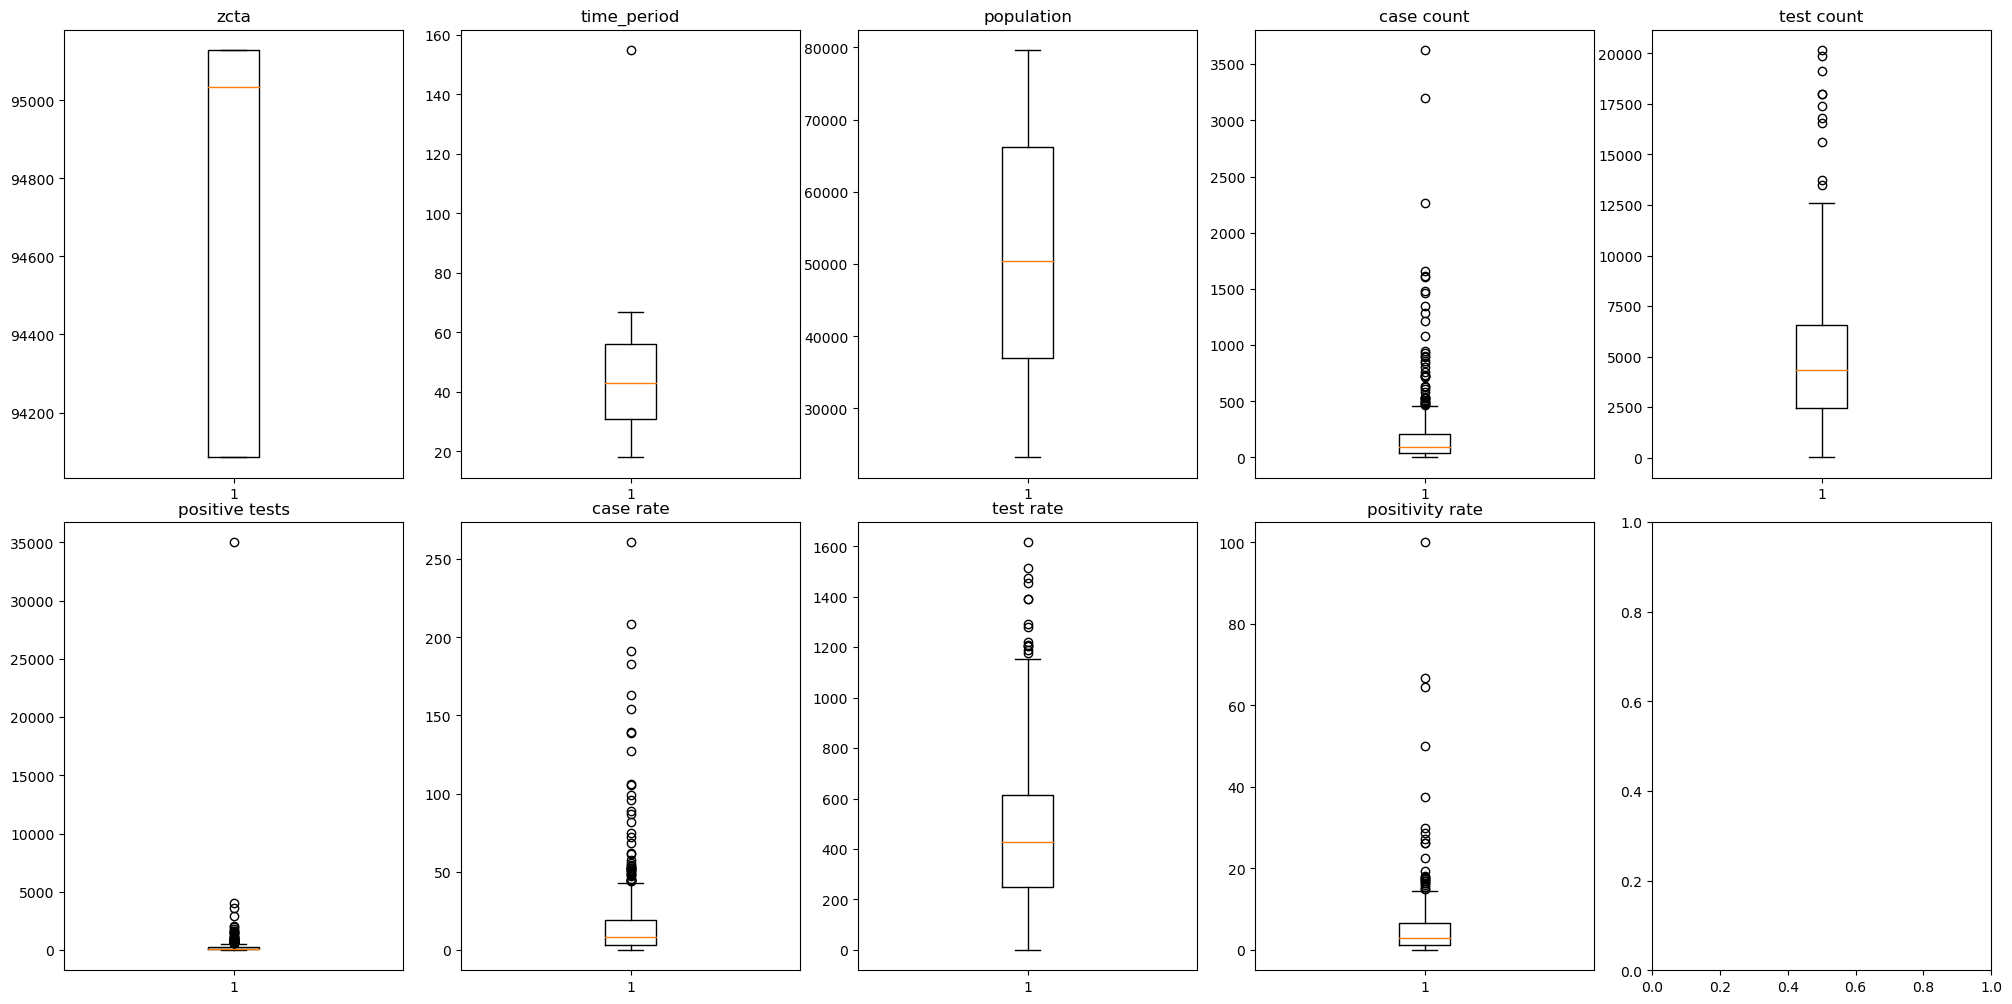

In [36]:
import math
# Calculate the number of rows and columns needed based on the number of numeric columns
num_columns = sum(1 for d in data2 if is_numeric_dtype(data2[d]))
num_rows = math.ceil(num_columns / 5)

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 5 * num_rows))
fig.tight_layout()

# Iterate through each numeric column in the DataFrame
i = 0
j = 0
for d in data2:
    if is_numeric_dtype(data2[d]):
        axes[i, j].boxplot(data2[d])
        axes[i, j].set_title(d)
        j += 1
        if j == 5:
            j = 0
            i += 1

plt.show()

In [11]:
# Define a function to replace outliers with mean
def replace_outliers_with_mean(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    # Use a dynamic threshold based on the IQR
    outliers_mask = (col < Q1 - 1.5 * IQR) | (col > Q3 + 1.5 * IQR)
    # Replace outliers with mean value
    col[outliers_mask] = col.mean()
    return col

columns_to_exclude = ['Start date', 'end date']
df_imputedNum = data2.drop(columns=columns_to_exclude)

# Apply the outlier replacement function to each column
df_outliers_removed = df_imputedNum.apply(replace_outliers_with_mean)

# Add 'Start date' and 'end date' back to the DataFrame
df_outliers_removed[['Start date', 'end date']] = data2[['Start date', 'end date']]
data2 = df_outliers_removed

# Display the DataFrame with outliers replaced by mean
print(data2)

      zcta  time_period  population  case count  test count  positive tests  \
0    95129         32.0       39741        22.0      2543.0            23.0   
1    95129         43.0       39741        91.0      3315.0            14.0   
2    95129         40.0       39741        34.0      4816.0            37.0   
3    95129         55.0       39741       110.0     10194.0           175.0   
4    95129         44.0       39741        14.0      3033.0            17.0   
..     ...          ...         ...         ...         ...             ...   
332  94085         59.0       23223       165.0      2315.0           192.0   
333  94085         63.0       23223       150.0      1348.0           190.0   
334  94085         61.0       23223       219.0      1696.0           255.0   
335  94085         27.0       23223        53.0      1379.0            61.0   
336  94085         57.0       23223        30.0      1949.0            34.0   

     case rate   test rate  positivity rate Start d

In [12]:
data2.to_csv("data2.csv")


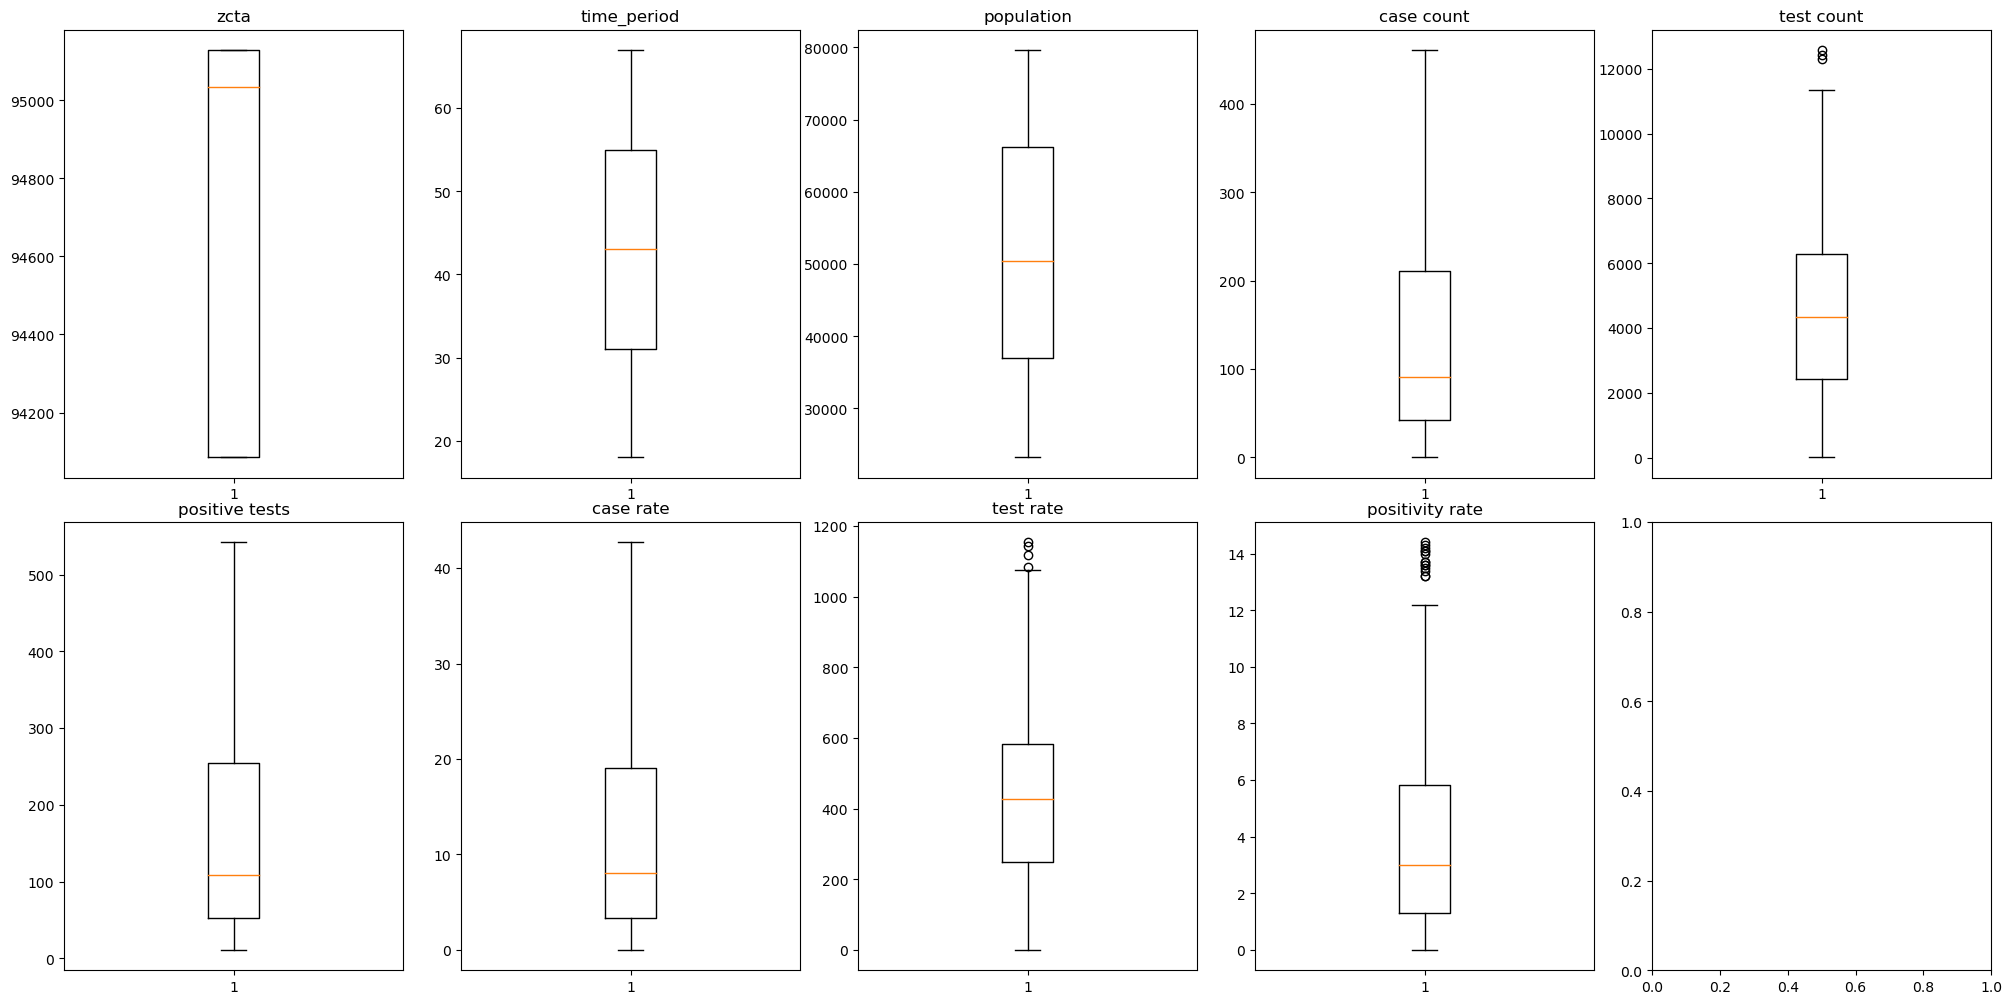

In [38]:
import math
# Calculate the number of rows and columns needed based on the number of numeric columns
num_columns = sum(1 for d in data2 if is_numeric_dtype(data2[d]))
num_rows = math.ceil(num_columns / 5)

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 5 * num_rows))
fig.tight_layout()

# Iterate through each numeric column in the DataFrame
i = 0
j = 0
for d in data2:
    if is_numeric_dtype(data2[d]):
        axes[i, j].boxplot(data2[d])
        axes[i, j].set_title(d)
        j += 1
        if j == 5:
            j = 0
            i += 1

plt.show()

### La distribution du nombre total des cas confirmés et tests positifs par zones

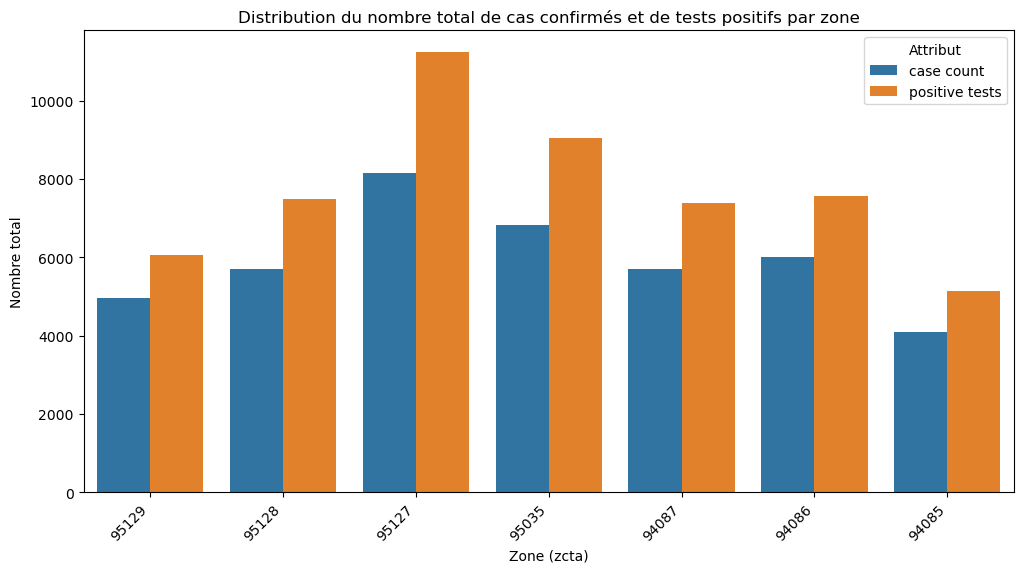

In [80]:
# Convertir la colonne 'zcta' en type de données chaîne
data2['zcta'] = data2['zcta'].astype(str)

# Créer un DataFrame pour les deux attributs
df_combined = pd.melt(data2, id_vars='zcta', value_vars=['case count', 'positive tests'])

# Afficher les deux attributs sur le même plot
plt.figure(figsize=(12, 6))
sns.barplot(x='zcta', y='value', hue='variable', data=df_combined, estimator=sum, ci=None)
plt.title('Distribution du nombre total de cas confirmés et de tests positifs par zone')
plt.xlabel('Zone (zcta)')
plt.ylabel('Nombre total')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attribut')
plt.show()

### Comment les tests COVID-19, les tests positifs et le nombre de cas évolue au fil du temps
### (hebdomadaire, mensuel et annuel) pour une zone choisit

#### Annuel

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1976\252065526.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_zone.loc[:, 'year'] = selected_zone['Start date'].dt.year


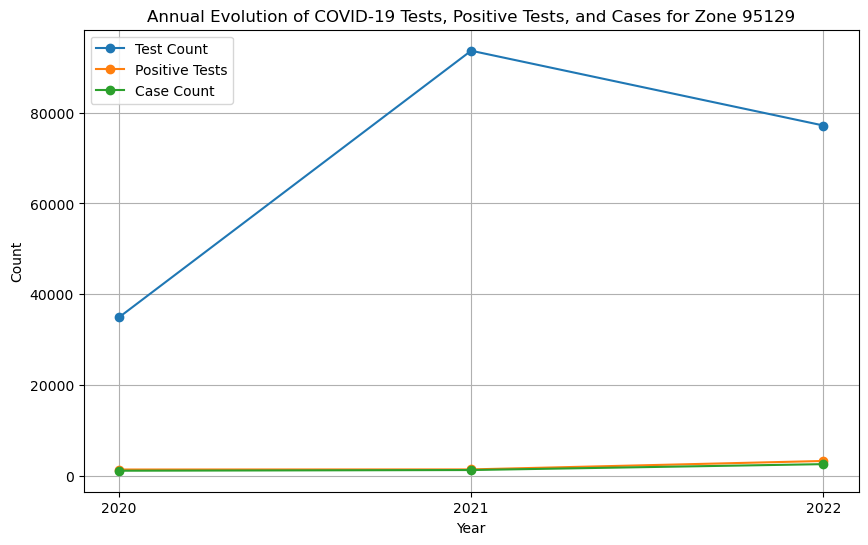

In [103]:
data2['zcta'] = data2['zcta'].astype(int)
data2['test count'] = data2['test count'].astype(float)
data2['positive tests'] = data2['positive tests'].astype(float)
data2['case count'] = data2['case count'].astype(float)
data2['Start date'] = pd.to_datetime(data2['Start date'], format='%m/%d/%Y')
# Filter data for the zone 95129
selected_zone = data2[data2['zcta'] == 95129]
# Aggregate data by year
selected_zone.loc[:, 'year'] = selected_zone['Start date'].dt.year  
agg_data = selected_zone.groupby('year').agg({
    'test count': 'sum',
    'positive tests': 'sum',
    'case count': 'sum'
}).reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))

plt.plot(agg_data['year'], agg_data['test count'], label='Test Count', marker='o')
plt.plot(agg_data['year'], agg_data['positive tests'], label='Positive Tests', marker='o')
plt.plot(agg_data['year'], agg_data['case count'], label='Case Count', marker='o')
plt.title('Annual Evolution of COVID-19 Tests, Positive Tests, and Cases for Zone 95129')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

# Set x-axis ticks explicitly as discrete years
plt.xticks(agg_data['year'].unique())

plt.show()

#### Mensuel

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1976\450983924.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_zone.loc[:, 'year_month'] = selected_zone['Start date'].dt.to_period('M').astype(str)


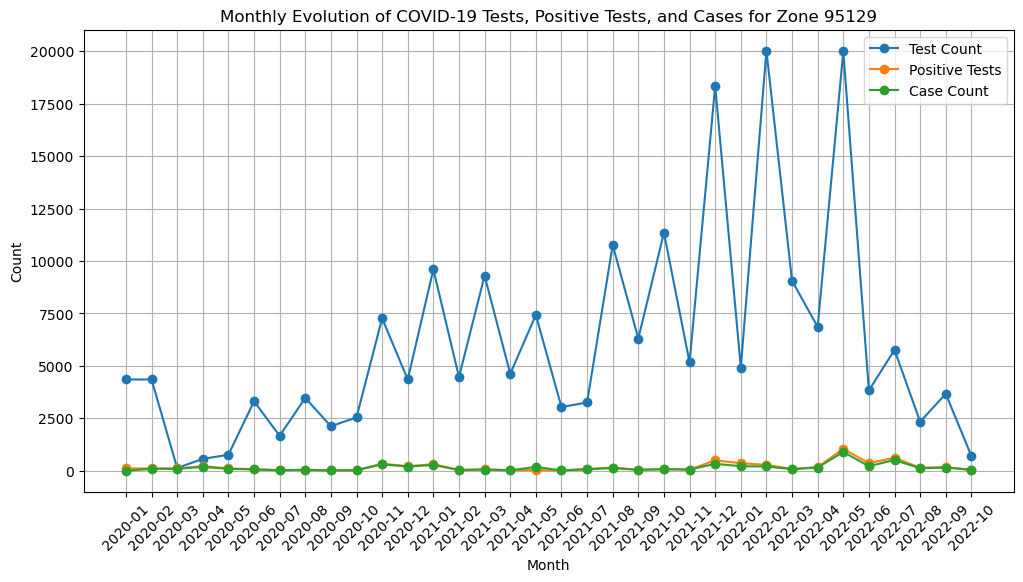

In [94]:
data2['Start date'] = pd.to_datetime(data2['Start date'], format='%m-%d-%Y')

# Filter data for the zone 95129
selected_zone = data2[data2['zcta'] == 95129]

# Aggregate data by month
selected_zone.loc[:, 'year_month'] = selected_zone['Start date'].dt.to_period('M').astype(str)
agg_data = selected_zone.groupby('year_month').agg({
    'test count': 'sum',
    'positive tests': 'sum',
    'case count': 'sum'
}).reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))

plt.plot(agg_data['year_month'], agg_data['test count'], label='Test Count', marker='o')
plt.plot(agg_data['year_month'], agg_data['positive tests'], label='Positive Tests', marker='o')
plt.plot(agg_data['year_month'], agg_data['case count'], label='Case Count', marker='o')

plt.title('Monthly Evolution of COVID-19 Tests, Positive Tests, and Cases for Zone 95129')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Hebdomadaire

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1976\2431233513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_zone.loc[:, 'week'] = selected_zone['Start date'].dt.to_period('W')


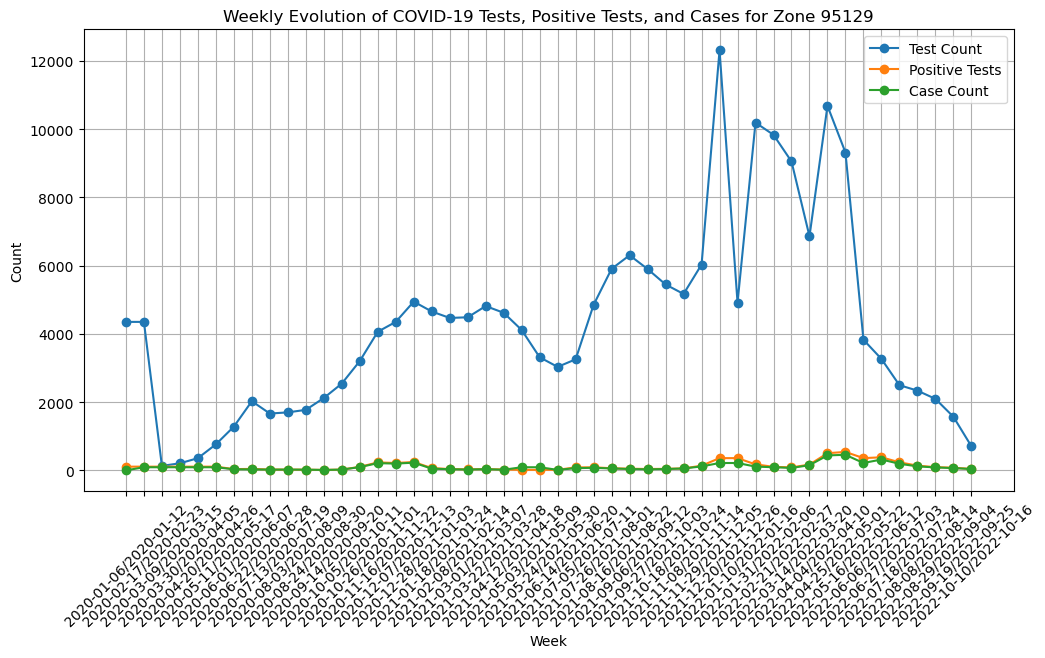

In [95]:
data2['Start date'] = pd.to_datetime(data2['Start date'], format='%m-%d-%Y')
# Filter data for the zone 95129
selected_zone = data2[data2['zcta'] == 95129]
# Aggregate data by week
selected_zone.loc[:, 'week'] = selected_zone['Start date'].dt.to_period('W')
agg_data = selected_zone.groupby('week').agg({
    'test count': 'sum',
    'positive tests': 'sum',
    'case count': 'sum'
}).reset_index()

# Convert 'week' to string for plotting
agg_data['week_str'] = agg_data['week'].astype(str)

# Plot the line chart
plt.figure(figsize=(12, 6))

plt.plot(agg_data['week_str'], agg_data['test count'], label='Test Count', marker='o')
plt.plot(agg_data['week_str'], agg_data['positive tests'], label='Positive Tests', marker='o')
plt.plot(agg_data['week_str'], agg_data['case count'], label='Case Count', marker='o')

plt.title('Weekly Evolution of COVID-19 Tests, Positive Tests, and Cases for Zone 95129')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Comment les cas covid positifs sont distribués par zone et par année

#### Par zone

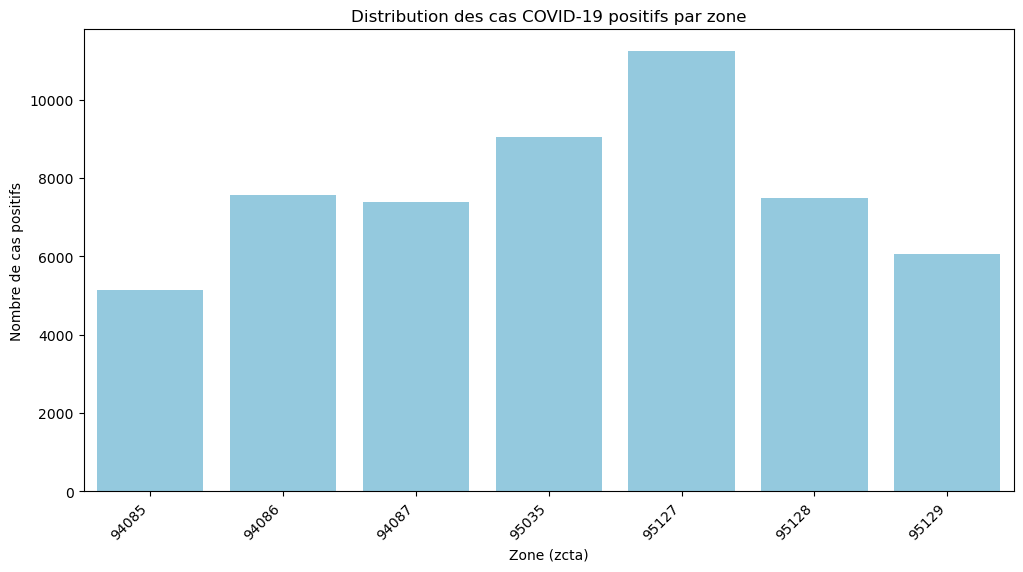

In [96]:
# Convertir la colonne 'zcta' en type de données chaîne
data2['zcta'] = data2['zcta'].astype(str)

# Créer un DataFrame pour les cas positifs par zone
df_positive_tests = data2.groupby(['zcta'])['positive tests'].sum().reset_index()

# Afficher le Stacked Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='zcta', y='positive tests', data=df_positive_tests, color='skyblue')
plt.title('Distribution des cas COVID-19 positifs par zone')
plt.xlabel('Zone (zcta)')
plt.ylabel('Nombre de cas positifs')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Par année

<Figure size 1200x800 with 0 Axes>

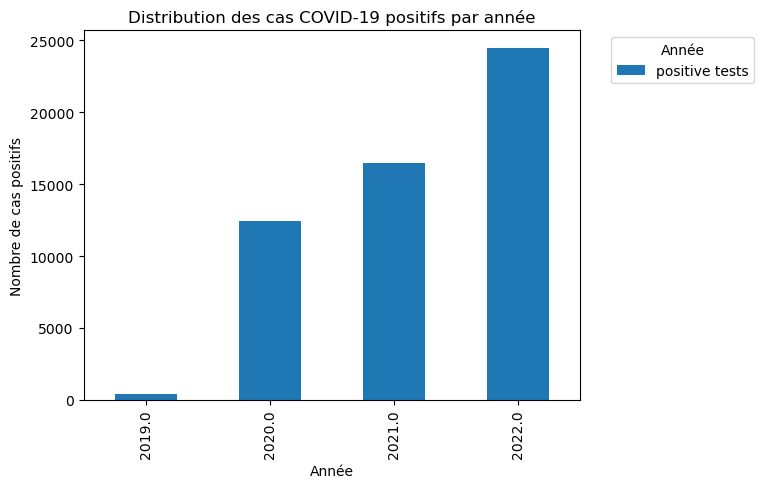

In [97]:
# Convertir les colonnes de dates en type de données datetime avec le format mois/jour/année
data2['Start date'] = pd.to_datetime(data2['Start date'], format='%m-%d-%Y')
data2['end date'] = pd.to_datetime(data2['end date'], format='%m-%d-%Y')

# Ajouter une colonne pour extraire l'année
data2['Year'] = data2['Start date'].dt.year

# Filtrer les données positives
positive_data = data2[data2['positive tests'].notna()]

# Créer un DataFrame pivot pour les cas positifs par année
pivot_data = positive_data.pivot_table(values='positive tests', index='Year', aggfunc='sum')

# Créer un Stacked Bar chart
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True)

plt.xlabel('Année')
plt.ylabel('Nombre de cas positifs')
plt.title('Distribution des cas COVID-19 positifs par année')
plt.legend(title='Année', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Le rapport entre la population et le nombre de tests effectués

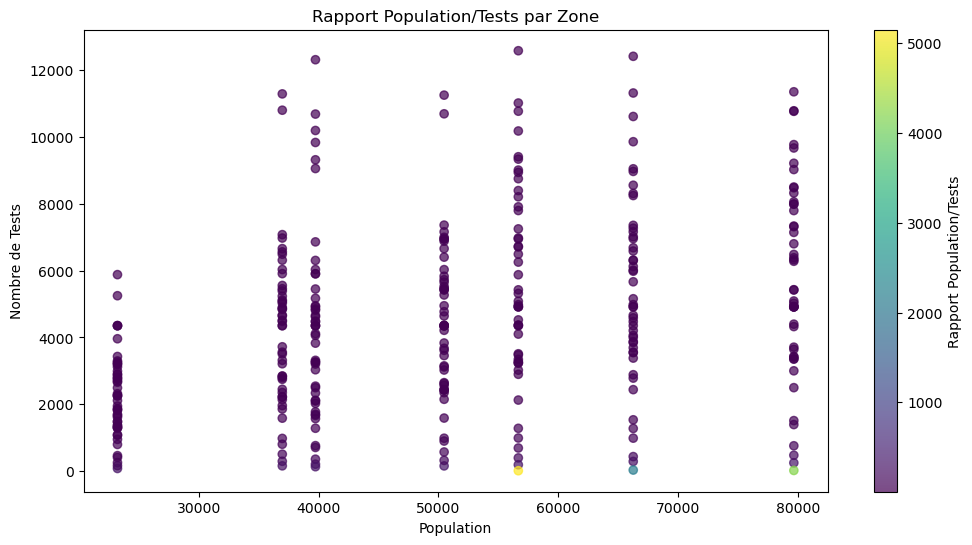

In [98]:
# Convertir la colonne 'zcta' en type de données chaîne
data2['zcta'] = data2['zcta'].astype(str)

# Créer une nouvelle colonne pour le rapport population/tests
data2['population_to_tests_ratio'] = data2['population'] / data2['test count']

# Afficher le graphique en nuage de points
plt.figure(figsize=(12, 6))
plt.scatter(data2['population'], data2['test count'], c=data2['population_to_tests_ratio'], cmap='viridis', alpha=0.7)
plt.title('Rapport Population/Tests par Zone')
plt.xlabel('Population')
plt.ylabel('Nombre de Tests')
plt.colorbar(label='Rapport Population/Tests')
plt.show()

### Les 5 zones les plus fortement impactées par le coronavirus

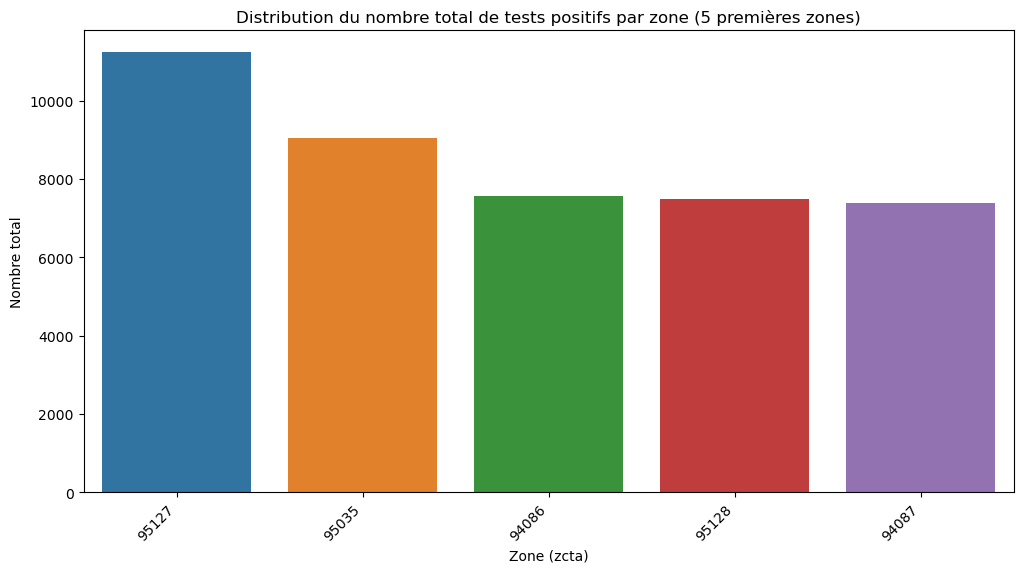

In [99]:
# Créer un DataFrame pour les deux attributs
df_combined = pd.melt(data2, id_vars='zcta', value_vars=['positive tests'])

# Trier le DataFrame par le nombre total de tests positifs par zone
df_combined = df_combined.groupby('zcta')['value'].sum().reset_index()
df_combined = df_combined.sort_values(by='value', ascending=False)

# Sélectionner les cinq premières zones
df_combined = df_combined.head(5)

# Afficher les deux attributs sur le même plot
plt.figure(figsize=(12, 6))
sns.barplot(x='zcta', y='value', data=df_combined)
plt.title('Distribution du nombre total de tests positifs par zone (5 premières zones)')
plt.xlabel('Zone (zcta)')
plt.ylabel('Nombre total')
plt.xticks(rotation=45, ha='right')
plt.show()


### Le rapport entre les cas confirmés, les tests effectués et les tests positifs pour chaque zone (pour une période choisie)

<Figure size 1200x800 with 0 Axes>

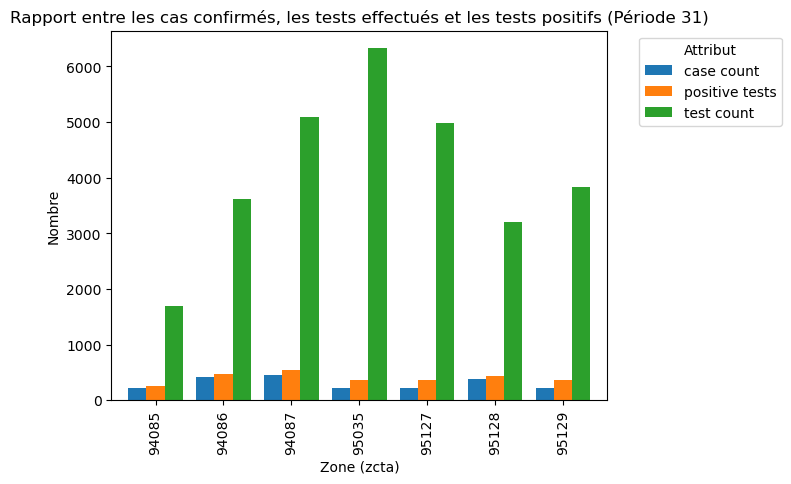

In [100]:
data2['Start date'] = pd.to_datetime(data2['Start date'], format='%m-%d-%Y')
data2['end date'] = pd.to_datetime(data2['end date'], format='%m-%d-%Y')

# Filtrer les données pour la période choisie (time_period = 61)
selected_period_data = data2[data2['time_period'] == 61]

# Créer un DataFrame pivot pour les cas confirmés, les tests effectués et les tests positifs par zone
pivot_data = selected_period_data.pivot_table(values=['case count', 'test count', 'positive tests'], index='zcta', aggfunc='sum')

# Créer un Bar chart groupé
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', width=0.8, stacked=False)

plt.xlabel('Zone (zcta)')
plt.ylabel('Nombre')
plt.title('Rapport entre les cas confirmés, les tests effectués et les tests positifs (Période 31)')
plt.legend(title='Attribut', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Extraction de motifs fréquents, règles d’associations et corrélations

In [1]:
import pandas as pd 
import numpy as np
data3 = pd.read_excel('Dataset3.xlsx')
print("Taille du Dataset3 est : ", data3.shape)
data3

Taille du Dataset3 est :  (295, 6)


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.90,sandy,Coconut,Urea
4,25.04,95.90,174.80,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,26.07,96.70,143.53,sandy,Coconut,MOP
291,25.63,83.53,209.90,silty clay,rice,MOP
292,24.52,83.54,230.45,Clayey,rice,MOP
293,25.66,83.47,217.38,Clayey,rice,MOP


### Discrétisation de l'attribut Temperature

#### Equal Width

In [3]:
def discretize_with_equal_width(data, column_to_discretize):
    # Définir le nombre de classes (intervalles)
    n = len(data)
    k = round(1 + (10 / 3) * np.log10(n)) 

    # Calculer la largeur de chaque intervalle
    value_min = data[column_to_discretize].min()
    value_max = data[column_to_discretize].max()
    interval_width = (value_max - value_min) / k

    # Créer les intervalles
    intervals = [value_min + i * interval_width for i in range(k)]
    intervals.append(value_max)

    # Discrétiser les valeurs de la colonne
    data[column_to_discretize + '_discretized'] = pd.cut(data[column_to_discretize], bins=intervals, labels=range(k))

    return data

column_name = 'Temperature' 
data3 = discretize_with_equal_width(data3, column_name)

# Afficher les valeurs discrétisées
print(data3[['Temperature', 'Temperature_discretized']])



     Temperature Temperature_discretized
0          24.87                       4
1          28.69                       7
2          20.27                       0
3          25.07                       4
4          25.04                       4
..           ...                     ...
290        26.07                       5
291        25.63                       5
292        24.52                       4
293        25.66                       5
294        23.83                       3

[295 rows x 2 columns]


#### Equal Frequency

In [7]:
def discretize_equal_frequency(data, column_to_discretize, num_bins):
    # Diviser les données en classes d'effectifs égaux
    data[column_to_discretize + '_discretized'] = pd.qcut(data[column_to_discretize], q=num_bins, labels=range(num_bins))

    return data

column_name = 'Temperature'  
num_bins = 5  # Nombre de classes d'effectifs égaux

discretized_data = discretize_equal_frequency(data3, column_name, num_bins)

# Afficher le résultat
print(discretized_data['Temperature_discretized'])

0      1
1      4
2      0
3      1
4      1
      ..
290    2
291    2
292    1
293    2
294    1
Name: Temperature_discretized, Length: 295, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]


### Ariori et les règles d'association

In [12]:
# Transformation du dataframe
new_df = pd.DataFrame()
new_df['id'] = data3.index + 1  
new_df['values'] = data3.apply(lambda row: f"{row['Temperature']},{row['Humidity']},{row['Rainfall']},{row['Soil']},{row['Crop']},{row['Fertilizer']}", axis=1)
new_df = new_df.dropna(subset=['values'])
# Affichage du nouveau dataframe
print(new_df)

      id                                        values
0      1            24.87,82.84,295.61,Clayey,rice,DAP
1      2  28.69,96.65,178.96,laterite,Coconut,Good NPK
2      3        20.27,81.64,270.44,silty clay,rice,MOP
3      4          25.07,95.02,192.9,sandy,Coconut,Urea
4      5         25.04,95.9,174.8,coastal,Coconut,Urea
..   ...                                           ...
290  291           26.07,96.7,143.53,sandy,Coconut,MOP
291  292         25.63,83.53,209.9,silty clay,rice,MOP
292  293            24.52,83.54,230.45,Clayey,rice,MOP
293  294            25.66,83.47,217.38,Clayey,rice,MOP
294  295        23.83,84.81,298.56,silty clay,rice,MOP

[295 rows x 2 columns]


In [13]:
import itertools


def Apriori_algorithm(df, min_support):
    # Create a dictionary to store the support of each candidate itemset
    candidate_support = {}

    # Generate the 1-itemsets candidates (C1)
    c1 = {}
    for _, row in df.iterrows():
        items = [item.strip() for item in row['values'].split(",")]  # Remove leading and trailing spaces
        for item in items:
            if item not in c1:
                c1[item] = 1
            else:
                c1[item] += 1

    # Print all items and their occurrence counts in C1
    print("C1:----------------------------------------------------------------------------------------")
    for item, count in c1.items():
        print(f"{item}: {count}")

    # Filter the 1-itemsets to keep only those with a support greater than or equal to the minimum support threshold
    lk1 = {item: count for item, count in c1.items() if count >= min_support}

    # Print the filtered 1-itemsets (L1)
    print("L1:----------------------------------------------------------------------------------------")
    for item, count in lk1.items():
        print(f"{item}: {count}")

    # Initialize the union dictionary (L) with items from L1
    L = lk1.copy()

    k = 2
    while True:
        # Generate the k-itemsets candidates (Ck) from Lk-1
        ck = {}
        for _, row in df.iterrows():
            items = [item.strip() for item in row['values'].split(",")]  # Remove leading and trailing spaces

            # Generate possible combinations of items of length k using itertools
            item_combinations = itertools.combinations(sorted(items), k)  # Sort items lexicographically

            # Update the support of the k-itemsets candidates
            for item_combination in item_combinations:
                item_combination_str = ",".join(item_combination)
                if item_combination_str not in ck:
                    ck[item_combination_str] = 1
                else:
                    ck[item_combination_str] += 1

        # Filter the k-itemsets to keep only those with a support greater than or equal to the minimum support threshold
        lk = {item: count for item, count in ck.items() if count >= min_support}

        if not lk:
            # If Lk is empty, stop the loop
            break

        # Update the union dictionary (L) with items from Lk
        L.update(lk)

        print(f"C{k}::----------------------------------------------------------------------------------------")
        for item, count in ck.items():
            print(f"{item}: {count}")

        # Print the filtered k-itemsets (Lk)
        print(f"L{k}::----------------------------------------------------------------------------------------")
        for item, count in lk.items():
            print(f"{item}: {count}")

        k += 1

    # Print the union of all Lk (L)    
    print("L:----------------------------------------------------------------------------------------")
    for item, count in L.items():
        print(f"{item}: {count}")
    return L


min_support = 20 # Minimum support threshold
Lk = Apriori_algorithm(new_df, min_support)



C1:----------------------------------------------------------------------------------------
24.87: 2
82.84: 2
295.61: 2
Clayey: 54
rice: 143
DAP: 86
28.69: 1
96.65: 1
178.96: 1
laterite: 28
Coconut: 152
Good NPK: 33
20.27: 1
81.64: 1
270.44: 1
silty clay: 65
MOP: 75
25.07: 4
95.02: 4
192.9: 2
sandy: 48
Urea: 101
25.04: 2
95.9: 2
174.8: 2
coastal: 50
20.82: 1
84.13: 1
230.22: 1
clay loam: 24
25.95: 4
93.41: 2
172.05: 2
alluvial: 26
26.49: 1
80.16: 1
242.86: 1
25.01: 2
95.59: 2
165.81: 2
21.87: 1
80.19: 1
224.56: 1
28.96: 2
95.16: 2
222.8: 2
26.3: 1
99.66: 1
215.92: 1
27.51: 1
94.19: 1
156.67: 1
23.68: 2
81.04: 2
233.7: 2
25.52: 3
94.38: 2
178.73: 2
25.79: 2
82.11: 1
243.51: 1
24.28: 1
80.3: 1
231.09: 1
26.59: 2
90.99: 2
178.81: 2
28.11: 2
90.02: 2
172.48: 2
28.36: 2
91.65: 2
160.73: 2
26.4: 1
81.06: 1
223.37: 1
21.72: 2
80.24: 2
277.96: 2
28.28: 1
93.65: 1
171.95: 1
21.97: 1
81.9: 1
227.36: 1
28.97: 1
98.1: 1
213.9: 1
27.13: 1
95.24: 1
204.72: 1
27.08: 2
97.0: 3
171.76: 2
27.31: 2
99.97

In [15]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def generate_association_rules(frequent_items, min_confidence):
    rules = []
    for itemset in frequent_items:
        if len(itemset) > 1:
            itemset_list = itemset.split(",")
            
            # Generate all possible combinations of antecedent and consequent
            itemset_powerset = list(powerset(itemset_list))
            for subset in itemset_powerset[1:-1]:  # Skip empty and full set
                antecedent = ",".join(sorted(subset))
                consequent = ",".join(sorted(set(itemset_list) - set(subset)))

                support_itemset = frequent_items[itemset]
                support_antecedent = frequent_items[antecedent]
                
                confidence = support_itemset / support_antecedent

                if confidence >= min_confidence:
                    rules.append((antecedent, consequent, confidence))
                    reverse_rule = (consequent, antecedent, confidence)
                    rules.append(reverse_rule)

    return rules


min_confidence =0.5 # Minimum confidence threshold
association_rules = generate_association_rules(Lk, min_confidence)

# Print generated association rules
print(f"Number of association Rules : {len(association_rules)}")
print("Association Rules:----------------------------------------------------------------------------------------")
for rule in association_rules:
    print(f"{rule[0]} => {rule[1]}, Confidence: {rule[2]}")



Number of association Rules : 28
Association Rules:----------------------------------------------------------------------------------------
Clayey => rice, Confidence: 1.0
rice => Clayey, Confidence: 1.0
DAP => rice, Confidence: 0.5465116279069767
rice => DAP, Confidence: 0.5465116279069767
Good NPK => Coconut, Confidence: 0.696969696969697
Coconut => Good NPK, Confidence: 0.696969696969697
laterite => Coconut, Confidence: 1.0
Coconut => laterite, Confidence: 1.0
MOP => rice, Confidence: 0.5066666666666667
rice => MOP, Confidence: 0.5066666666666667
silty clay => rice, Confidence: 1.0
rice => silty clay, Confidence: 1.0
Urea => Coconut, Confidence: 0.5247524752475248
Coconut => Urea, Confidence: 0.5247524752475248
sandy => Coconut, Confidence: 1.0
Coconut => sandy, Confidence: 1.0
coastal => Coconut, Confidence: 1.0
Coconut => coastal, Confidence: 1.0
clay loam => rice, Confidence: 1.0
rice => clay loam, Confidence: 1.0
alluvial => Coconut, Confidence: 1.0
Coconut => alluvial, Confiden

### Extraction des fortes règles d’associations

In [10]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s) + 1))

def calculate_cosine(confidence, support_antecedent, support_consequent):
    return confidence / (support_antecedent**0.5 * support_consequent**0.5)

def generate_association_rules(frequent_items, min_confidence, min_cosine):
    rules = []
    for itemset in frequent_items:
        if len(itemset) > 1:
            itemset_list = itemset.split(",")

            # Generate all possible combinations of antecedent and consequent
            itemset_powerset = list(powerset(itemset_list))
            for subset in itemset_powerset[1:-1]:  # Skip empty and full set
                antecedent = ",".join(sorted(subset))
                consequent = ",".join(sorted(set(itemset_list) - set(subset)))

                support_itemset = frequent_items[itemset]
                support_antecedent = frequent_items.get(antecedent, 0)
                support_consequent = frequent_items.get(consequent, 0)

                if support_antecedent == 0 or support_consequent == 0:
                    continue

                confidence = support_itemset / support_antecedent
                cosine = calculate_cosine(confidence, support_antecedent, support_consequent)

                if confidence >= min_confidence and cosine >= min_cosine:
                    rules.append({
                        "antecedent": antecedent,
                        "consequent": consequent,
                        "confidence": confidence,
                        "cosine": cosine
                    })
                    reverse_rule = {
                        "antecedent": consequent,
                        "consequent": antecedent,
                        "confidence": confidence,
                        "cosine": cosine
                    }
                    rules.append(reverse_rule)

    return rules


min_confidence_threshold = 1
min_cosine_threshold = 0.015
association_rules = generate_association_rules(Lk, min_confidence_threshold, min_cosine_threshold)

# Print the filtered rules
print(f"Number of association Rules : {len(association_rules)}")
print("Association Rules:----------------------------------------------------------------------------------------")
for rule in association_rules:
    print(f"Rule: {rule['antecedent']} => {rule['consequent']} | Confidence: {rule['confidence']:.2f}, Cosine: {rule['cosine']:.2f}")
    print("-" * 30)


Number of association Rules : 10
Association Rules:----------------------------------------------------------------------------------------
Rule: laterite => Coconut | Confidence: 1.00, Cosine: 0.02
------------------------------
Rule: Coconut => laterite | Confidence: 1.00, Cosine: 0.02
------------------------------
Rule: clay loam => rice | Confidence: 1.00, Cosine: 0.02
------------------------------
Rule: rice => clay loam | Confidence: 1.00, Cosine: 0.02
------------------------------
Rule: alluvial => Coconut | Confidence: 1.00, Cosine: 0.02
------------------------------
Rule: Coconut => alluvial | Confidence: 1.00, Cosine: 0.02
------------------------------
Rule: Urea,silty clay => rice | Confidence: 1.00, Cosine: 0.02
------------------------------
Rule: rice => Urea,silty clay | Confidence: 1.00, Cosine: 0.02
------------------------------
Rule: DAP,silty clay => rice | Confidence: 1.00, Cosine: 0.02
------------------------------
Rule: rice => DAP,silty clay | Confidence: 

### Graphique des résultats 

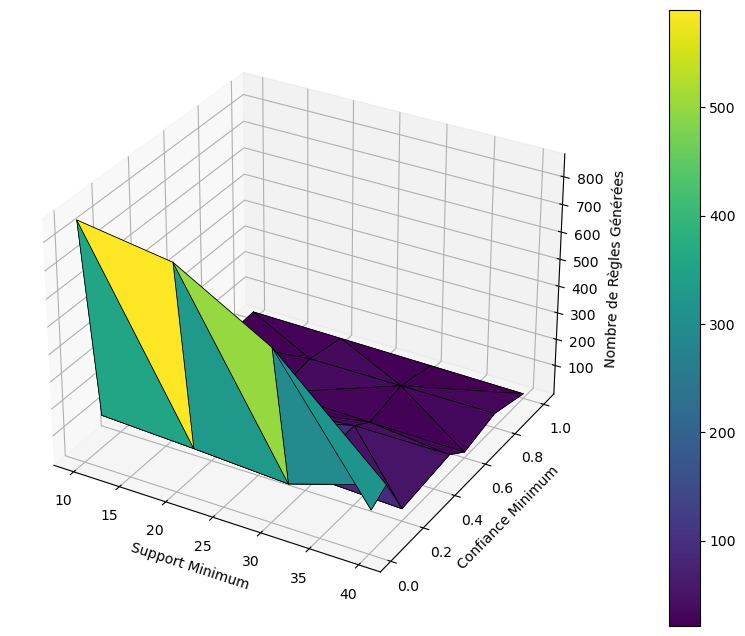

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Les nouvelles données fournies
support_min_values_k3_extended = [10, 20, 30, 40]
confidence_min_values_k3_extended = [0.01, 0.1, 0.2, 0.5, 0.6, 0.8, 1]


rules_generated_k3_extended = [
    [864, 812, 616, 146, 110, 94, 74],
    [184, 184, 162, 50, 36, 30, 24],
    [60, 60, 60, 24, 16, 12, 8],
    [44, 44, 44, 20, 16, 12, 8]
]

# Convertir la liste de listes en un tableau 2D NumPy
rules_generated_array_k3_extended = np.array(rules_generated_k3_extended)

# Créer une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Créer une grille 2D pour les valeurs de support et de confiance
X_k3_extended, Y_k3_extended = np.meshgrid(support_min_values_k3_extended, confidence_min_values_k3_extended)

# Aplatir les grilles X et Y
X_flat_k3_extended = X_k3_extended.flatten()
Y_flat_k3_extended = Y_k3_extended.flatten()
Z_flat_k3_extended = rules_generated_array_k3_extended.flatten()

# Tracer la surface 3D
ax.plot_trisurf(X_flat_k3_extended, Y_flat_k3_extended, Z_flat_k3_extended, cmap='viridis', linewidth=0.5, edgecolor='k')

# Ajouter des étiquettes
ax.set_xlabel('Support Minimum')
ax.set_ylabel('Confiance Minimum')
ax.set_zlabel('Nombre de Règles Générées')

# Ajouter une barre de couleur
cbar = fig.colorbar(ax.plot_trisurf(X_flat_k3_extended, Y_flat_k3_extended, Z_flat_k3_extended, cmap='viridis', linewidth=0.5, edgecolor='k'), ax=ax, pad=0.1)

# Afficher le graphique
plt.show()
